# Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs,make_circles, make_classification
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, mean_squared_error
from tqdm import tqdm

warnings.filterwarnings("ignore", message=".*does not have valid feature names.*")

# Задание 1

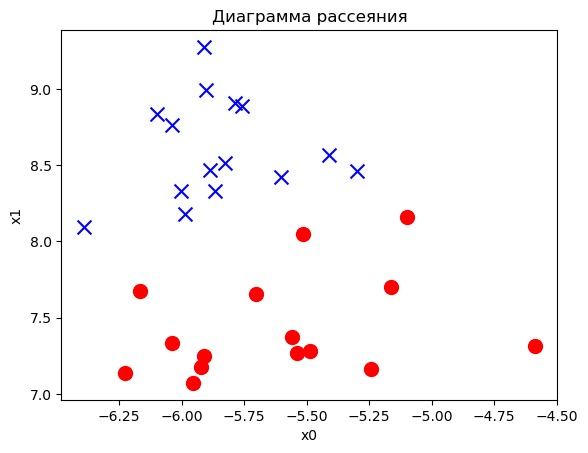

In [2]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [3]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)
svm_linear.coef_ , svm_linear.intercept_

(array([[-2.49920793,  6.14683189]]), array([-64.2533988]))

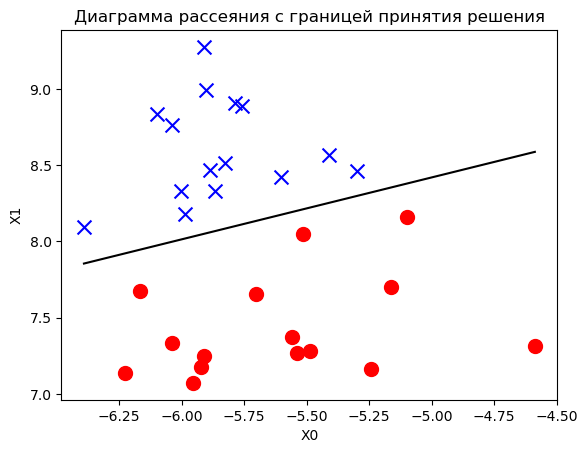

In [4]:
def plot_from_model(X,y, model):
    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

    plt.plot(X0,-model.intercept_[0]/model.coef_[0][1]-model.coef_[0][0]/model.coef_[0][1]*X0, c='k')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    plt.title("Диаграмма рассеяния c границей принятия решения")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

plot_from_model(X,y, svm_linear)

In [5]:
svm_linear.support_vectors_, svm_linear.support_, svm_linear.n_support_

(array([[-5.51629264,  8.04763857],
        [-5.30025769,  8.46071981],
        [-5.9879581 ,  8.18112559]]),
 array([ 0,  8, 29]),
 array([1, 2]))

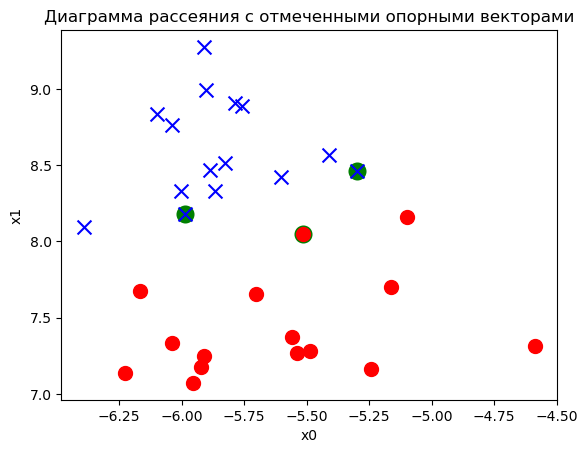

In [6]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

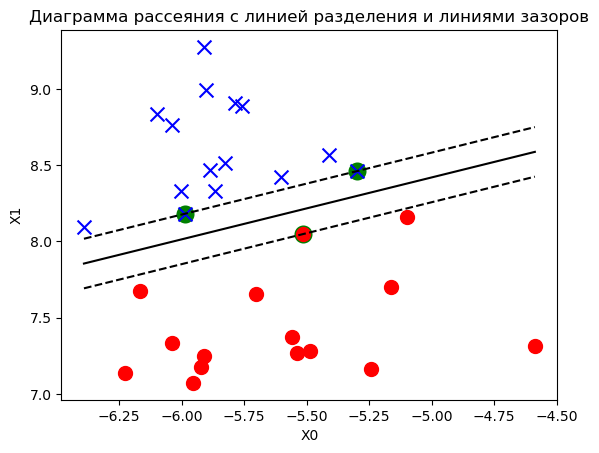

In [7]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

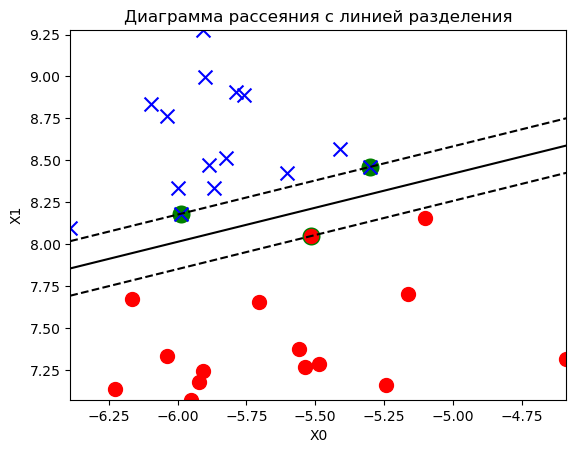

In [8]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

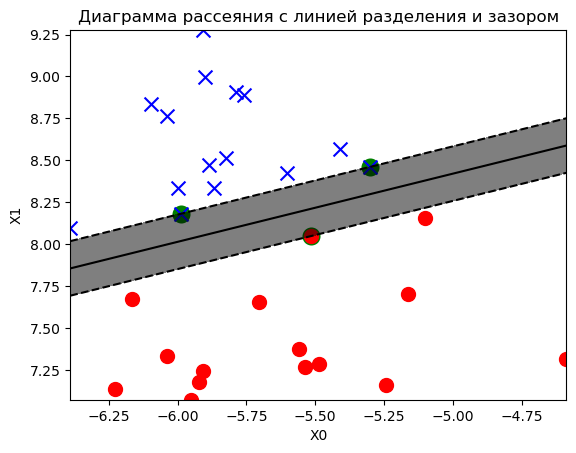

In [9]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

plot_decision_regions(X,y,svm_linear)

In [10]:
y_pred =  svm_linear.predict(X)

In [11]:
accuracy_score(y, y_pred)

1.0

In [12]:
confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]], dtype=int64)

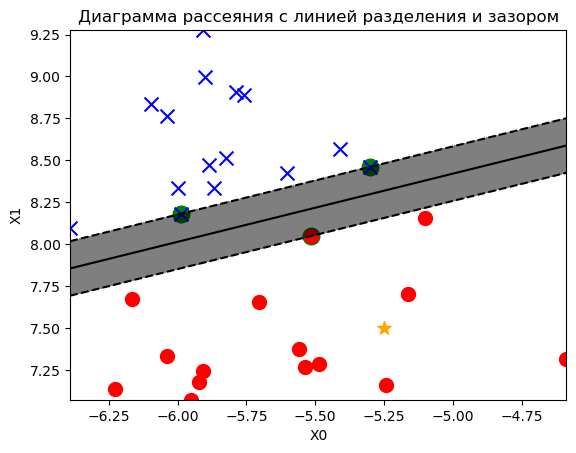

In [13]:
observation_new = [[-5.25, 7.5]]

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [14]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [15]:
svm_linear.predict(observation_new)

array([0])

# Задание 2

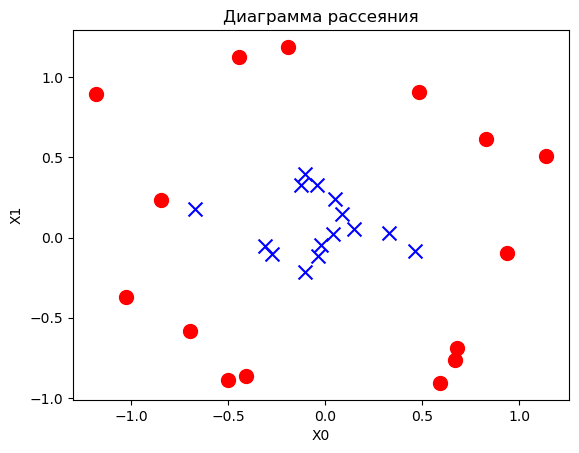

In [16]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [17]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)
svm_rbf.n_support_,svm_rbf.support_,svm_rbf.support_vectors_

(array([6, 2]),
 array([11, 20, 21, 23, 28, 29, 25, 27]),
 array([[ 0.9388294 , -0.09554628],
        [-0.84682371,  0.23287306],
        [-0.19166925,  1.18895776],
        [-0.69539045, -0.58523359],
        [ 0.68060508, -0.68615145],
        [ 0.48354792,  0.91063288],
        [-0.66975235,  0.17866445],
        [ 0.46427295, -0.08540628]]))

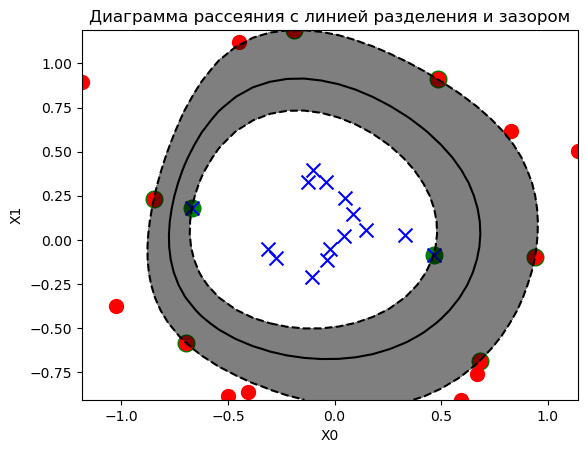

In [18]:
plot_decision_regions(X, y, svm_rbf)

In [19]:
accuracy_score(y, y_pred),confusion_matrix(y, y_pred)

(0.4666666666666667,
 array([[7, 8],
        [8, 7]], dtype=int64))

# Задание 3

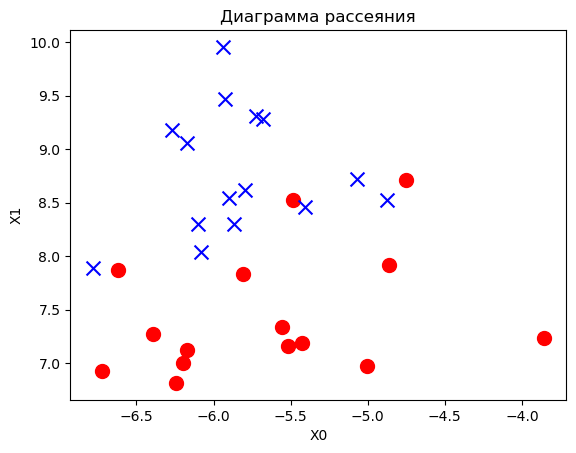

In [20]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [21]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

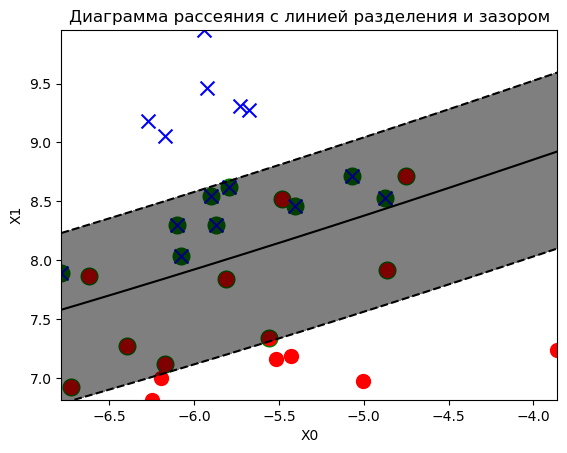

In [22]:
plot_decision_regions(X, y, svm_poly)

In [23]:
svm_poly.n_support_

array([9, 9])

In [24]:
accuracy_score(y, y_pred), confusion_matrix(y, y_pred)

(1.0,
 array([[15,  0],
        [ 0, 15]], dtype=int64))

# Задания для самостоятельного выполнения

## 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

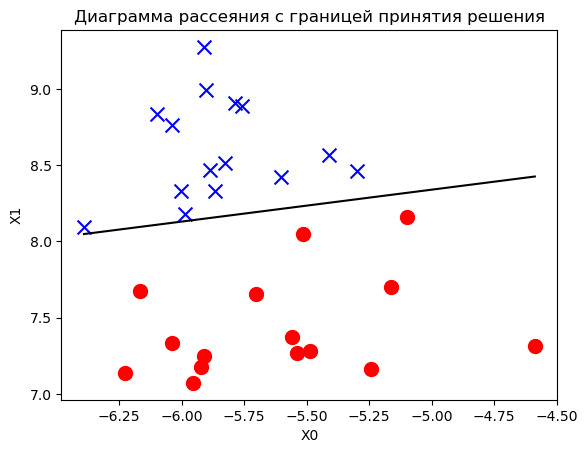

1.0









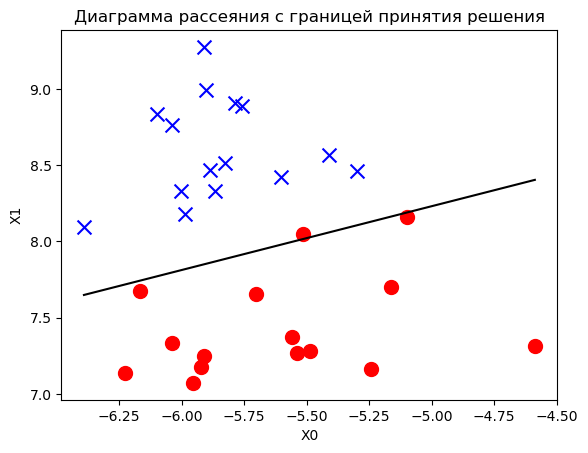

0.9666666666666667









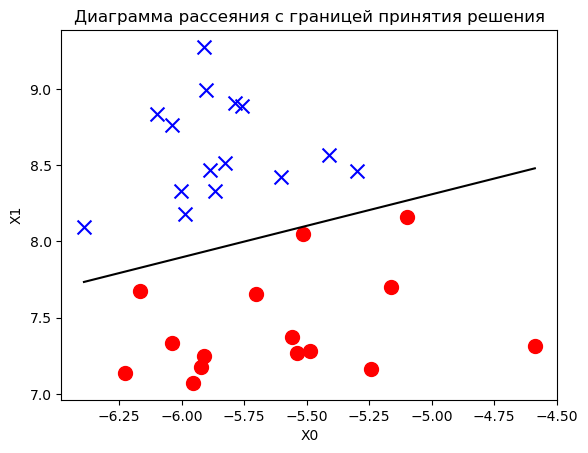

1.0









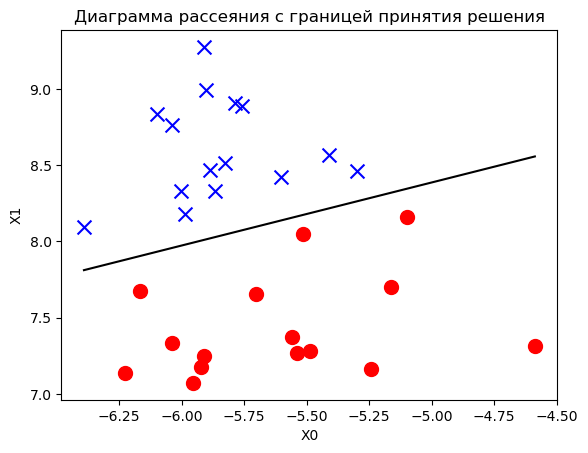

1.0









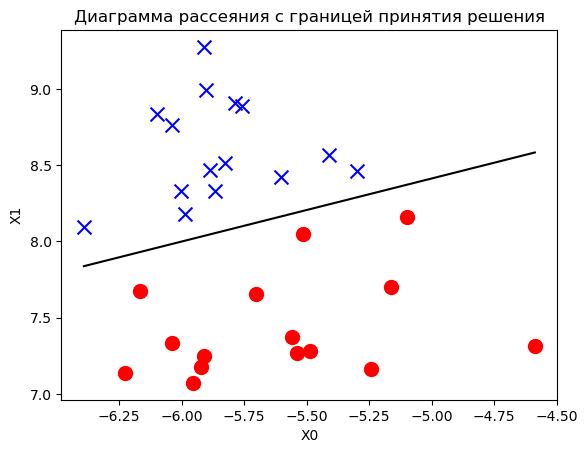

1.0









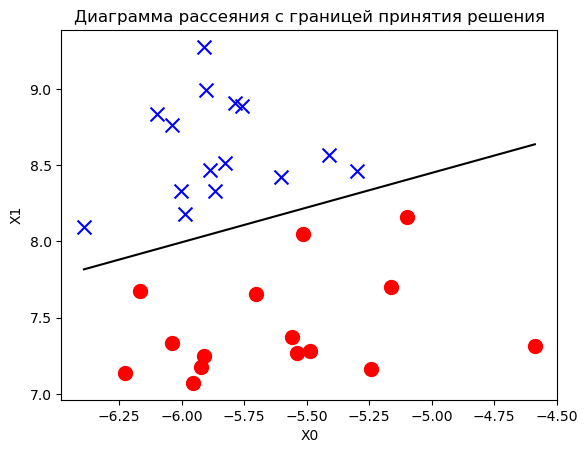

1.0









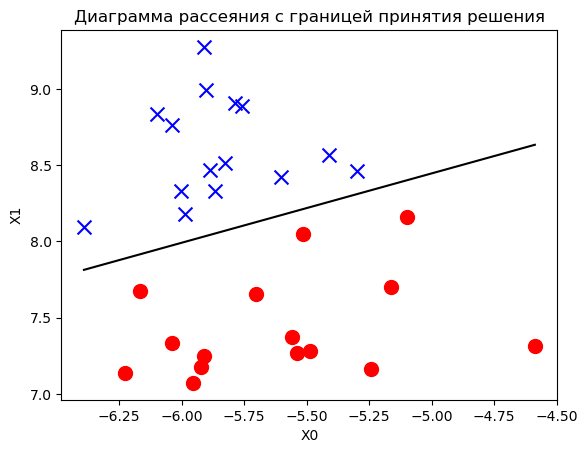

1.0









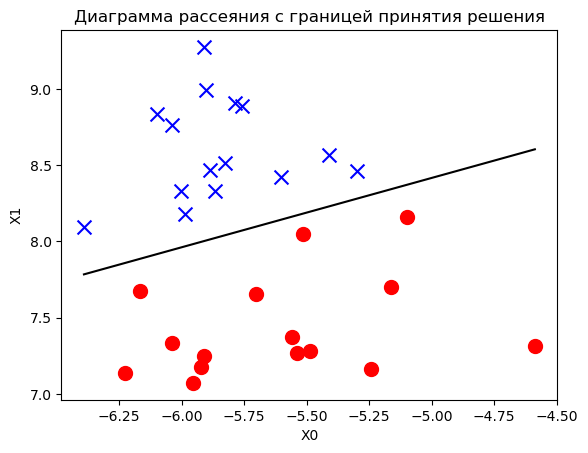

1.0









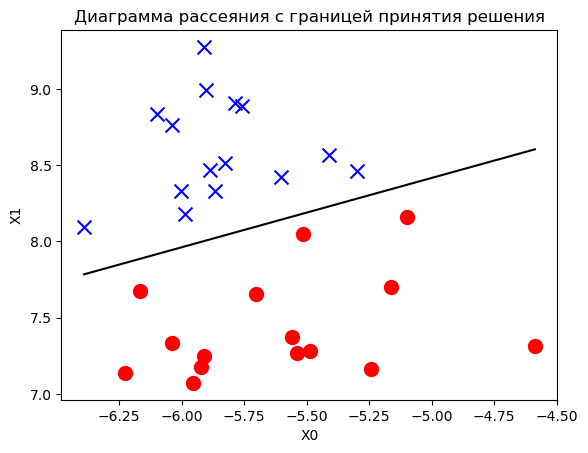

1.0









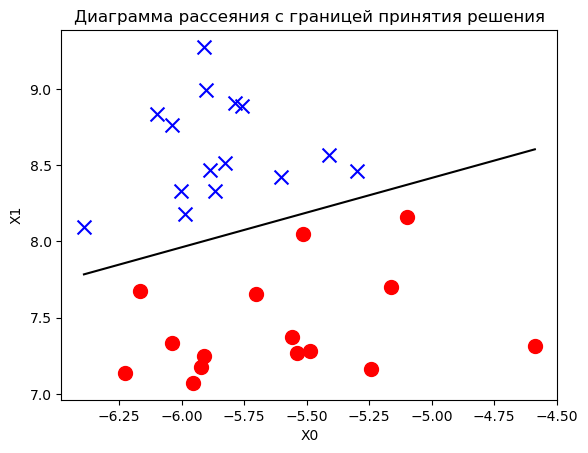

1.0









In [25]:
def check_c(C = 100):
  x, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
  m = SVC(kernel='linear', C=C)
  m.fit(x,y)
  plot_from_model(x,y,m)
  print(m.score(x,y))
  print('\n\n\n\n\n\n')
  
  
for i in np.linspace(0.1,100,10):
  check_c(i/10)

Параметр **`C`** в классе `SVC` (Support Vector Classifier) из библиотеки `scikit-learn` определяет степень регуляризации модели. Он регулирует баланс между минимизацией ошибки классификации на тренировочном наборе и максимизацией ширины разделяющей гиперплоскости.

Вот как работает параметр `C`:

1. **Маленькое значение `C`**:
   - Стремится к более широкой разделяющей гиперплоскости.
   - Модель становится более регуляризованной, что может привести к **недообучению**.
   - Предпочтение отдается более простым разделяющим границам, даже если некоторые точки классифицируются неверно.

2. **Большое значение `C`**:
   - Уменьшает регуляризацию, акцентируя внимание на минимизации ошибок классификации.
   - Модель стремится точно классифицировать тренировочные данные, что может привести к **переобучению**.


### Выводы
- При **малых значениях `C`**: модель может быть недостаточно сложной, что ведет к недообучению.
- При **больших значениях `C`**: модель может хорошо подходить тренировочным данным, но ее обобщающая способность (на тестовых данных) может снизиться.

Если у вас есть дополнительные данные или предпочтения для анализа, дайте знать — я могу доработать пример!

## 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

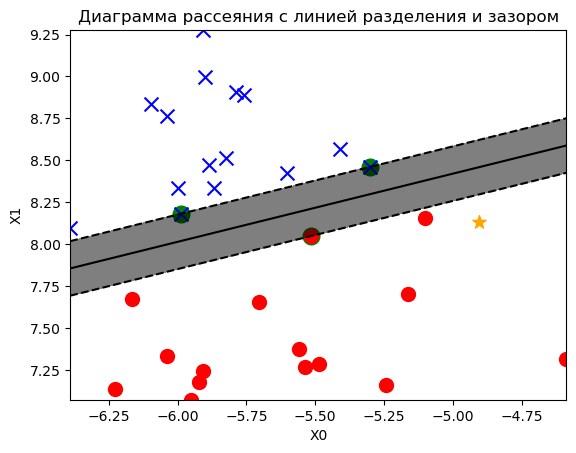

class of * point =  0
decision rate = -2.0163213095874397




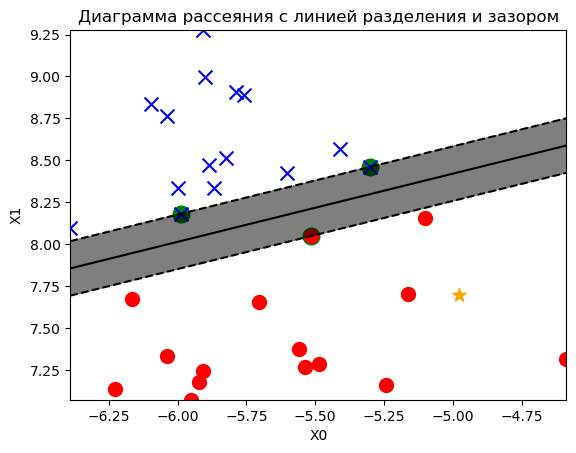

class of * point =  0
decision rate = -4.519073281055782




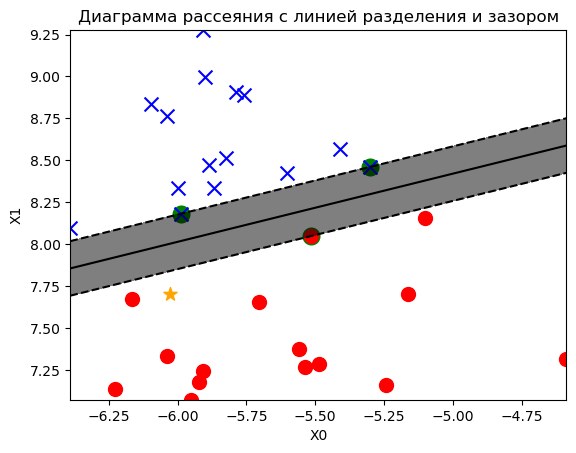

class of * point =  0
decision rate = -1.8414249123426742




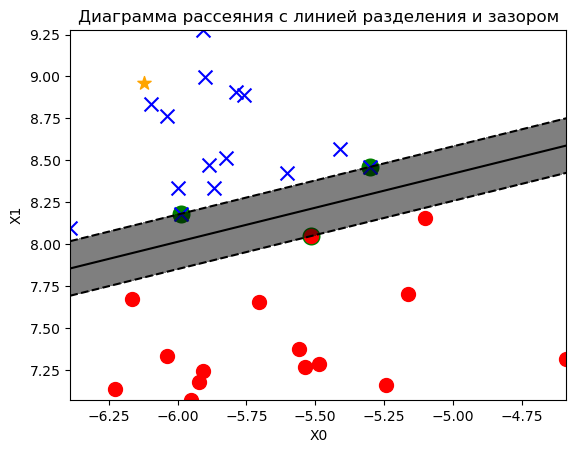

class of * point =  1
decision rate = 6.1325873460815075




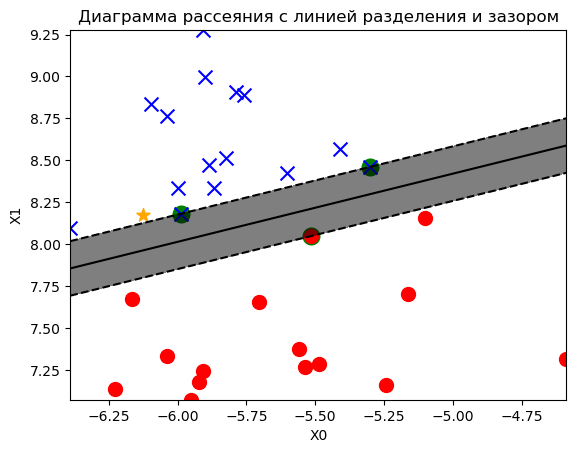

class of * point =  1
decision rate = 1.3046037925858656




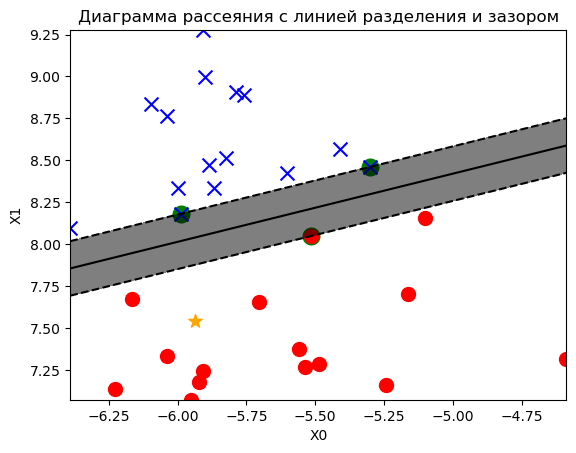

class of * point =  0
decision rate = -3.0806881935797463




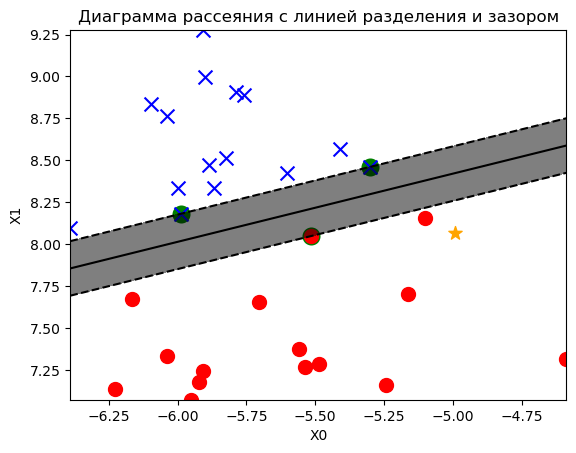

class of * point =  0
decision rate = -2.202881479963409




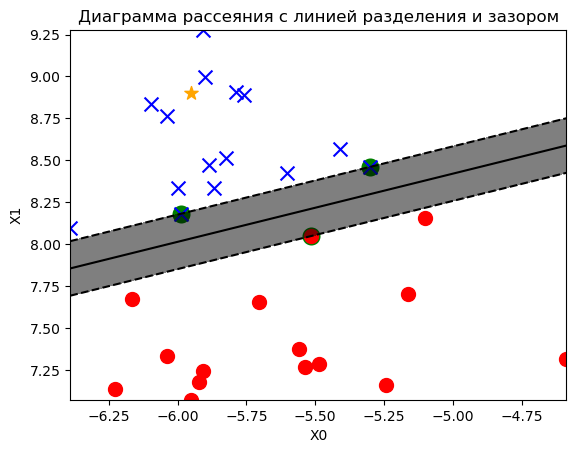

class of * point =  1
decision rate = 5.326175751952022




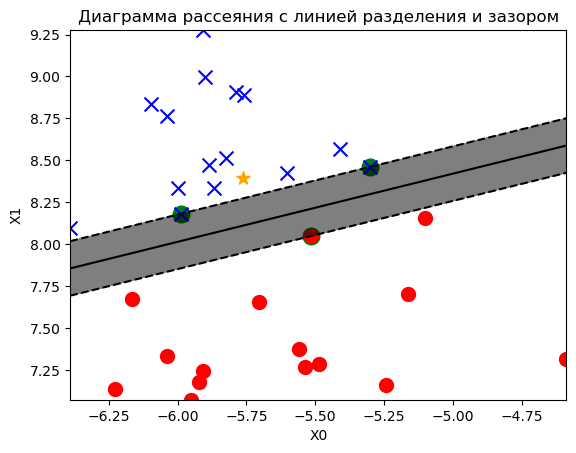

class of * point =  1
decision rate = 1.7506049930457976




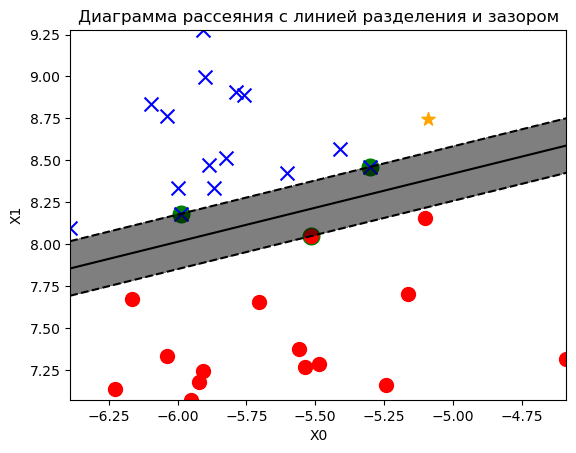

class of * point =  1
decision rate = 2.2264956863917433




In [26]:
import random
N = 10 # Количество случайных точек

x, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)


'''x = np.concatenate([x,np.array(observation_new)])
y = np.concatenate([y,[0]])'''

m = SVC(kernel='linear', C=100)
m.fit(x,y)

# Диапазоны для X0 и X1
X0_range = (-6.25, -4.75)
X1_range = (7.25, 9.00)

for i in range(N):
    # Случайная точка
    observation_new = np.array((random.uniform(*X0_range), random.uniform(*X1_range))).reshape(1,2)


    plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
    plot_decision_regions(x,y,m)
    print(f'class of * point =  {svm_linear.predict(observation_new)[0]}\ndecision rate = {svm_linear.decision_function(observation_new)[0]}\n\n')

### Выводы:
- Если точка лежит внутри зазора ($-1 < f(x) < 1$), это означает, что модель менее уверена в своем предсказании.
- Уверенность в предсказании увеличивается, если точка лежит за пределами полосы зазора ($|f(x)| > 1 $).

## 3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

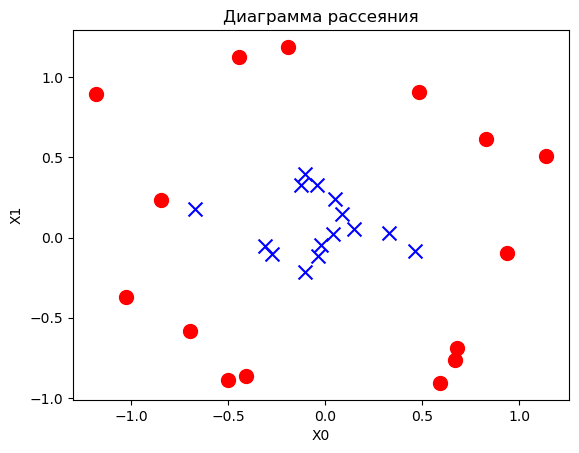

In [27]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

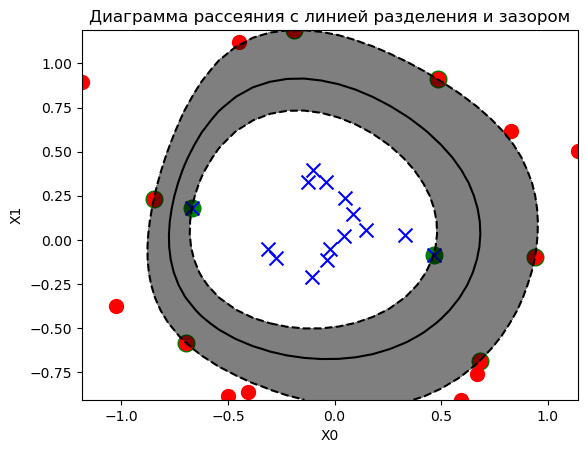

In [28]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)

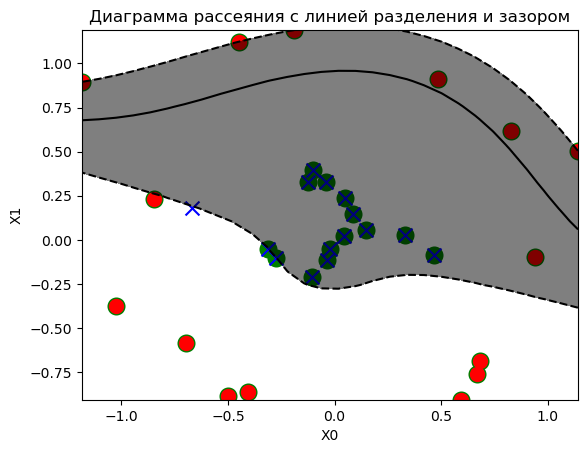

In [29]:
svm_rbf = SVC(kernel='poly', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)

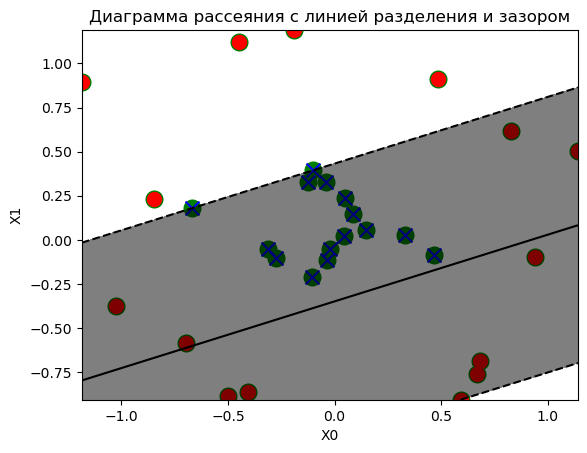

In [30]:
svm_rbf = SVC(kernel='linear', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)

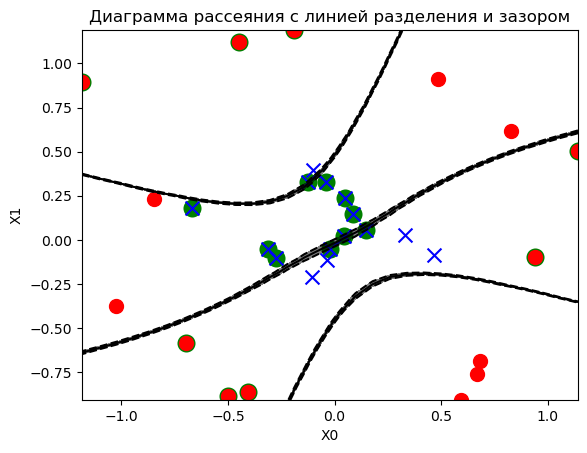

In [31]:
svm_rbf = SVC(kernel='sigmoid', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)

## 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

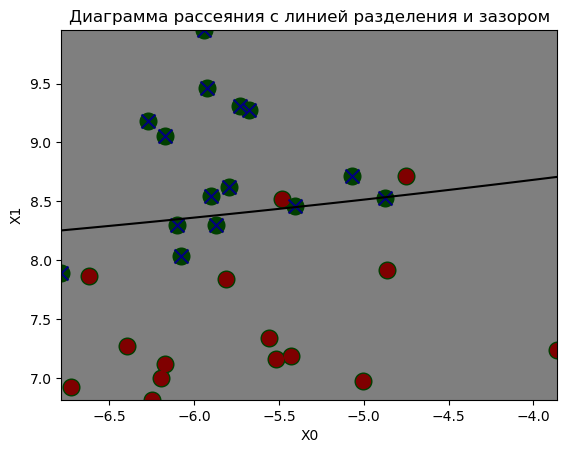

0.1


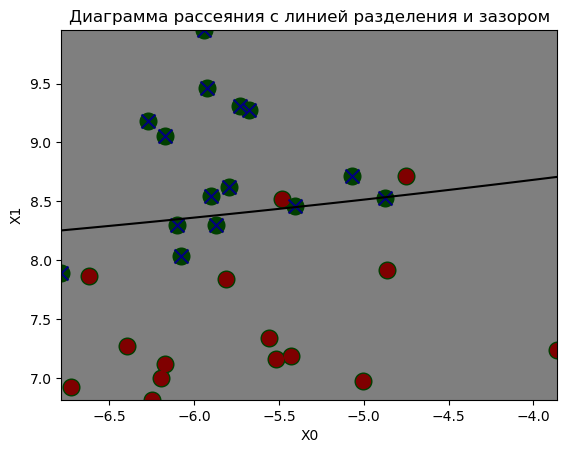

0.2202020202020202


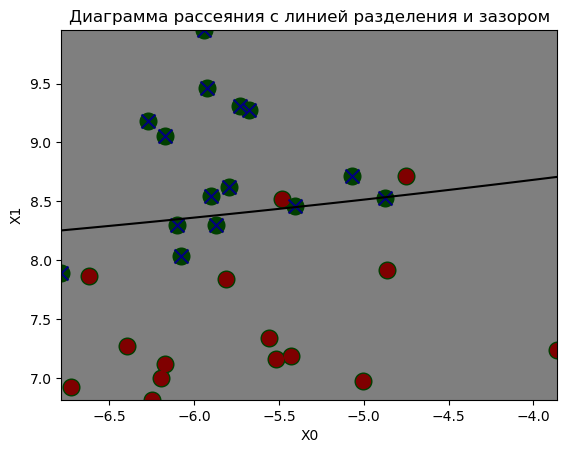

0.3404040404040404


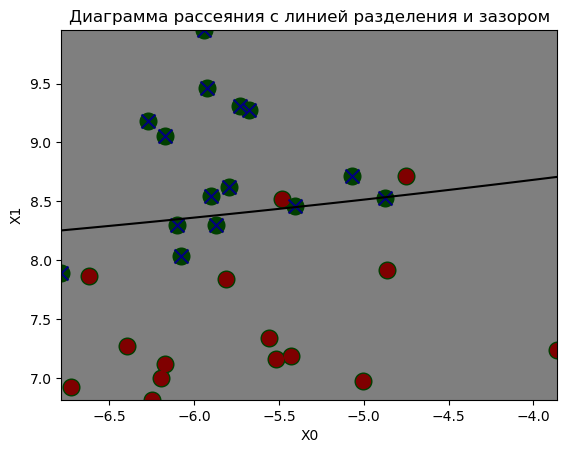

0.4606060606060606


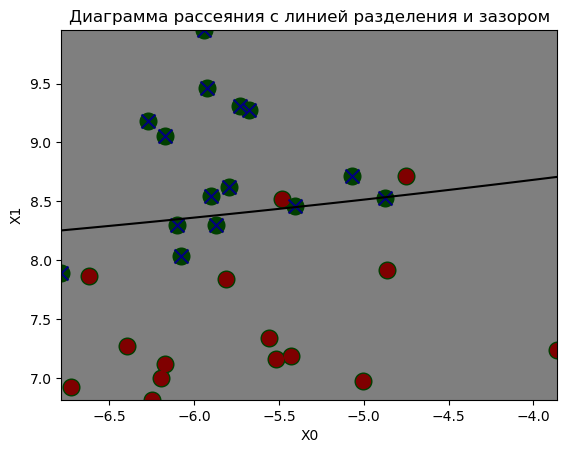

0.5808080808080808


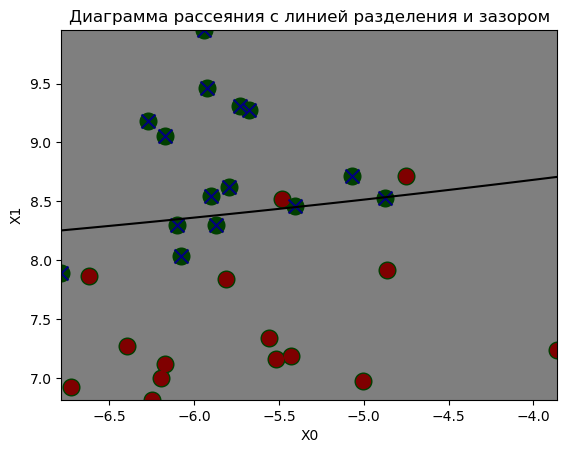

0.701010101010101


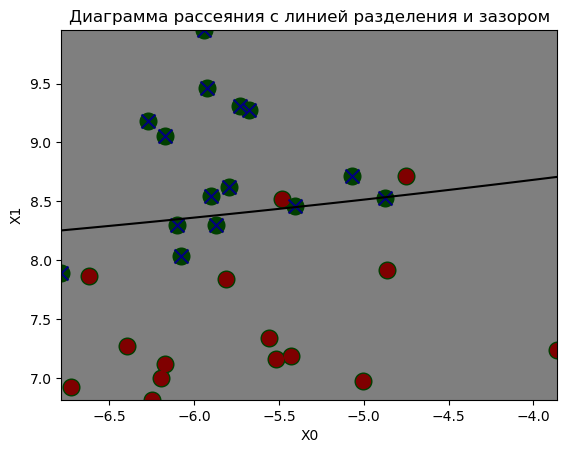

0.8212121212121212


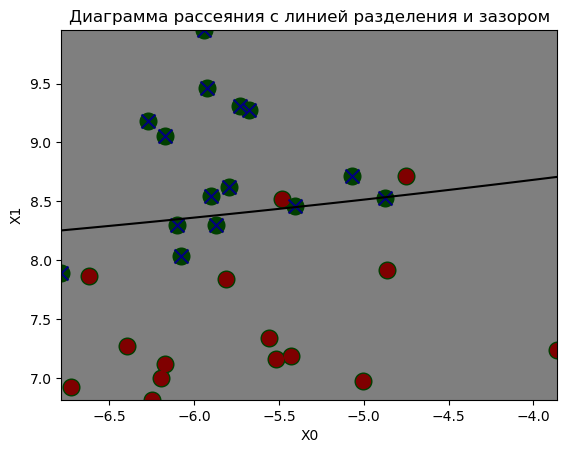

0.9414141414141414


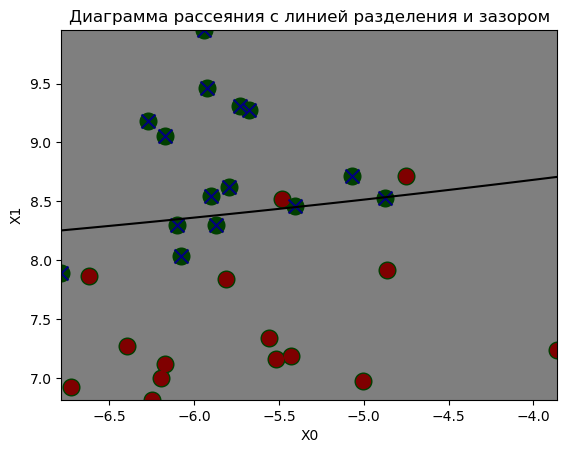

1.0616161616161617


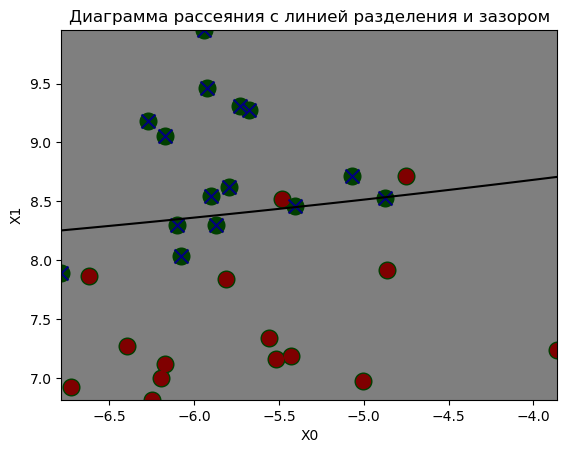

1.1818181818181819


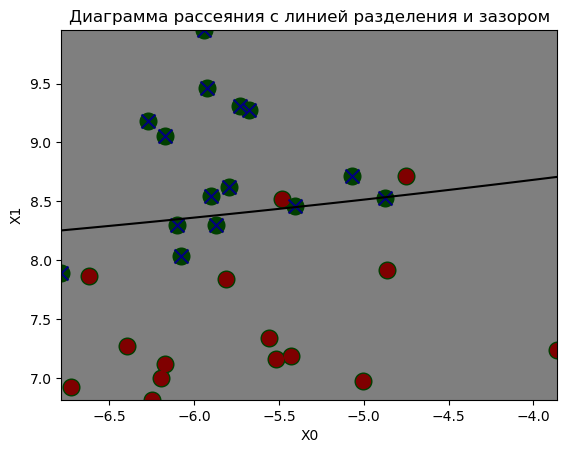

1.302020202020202


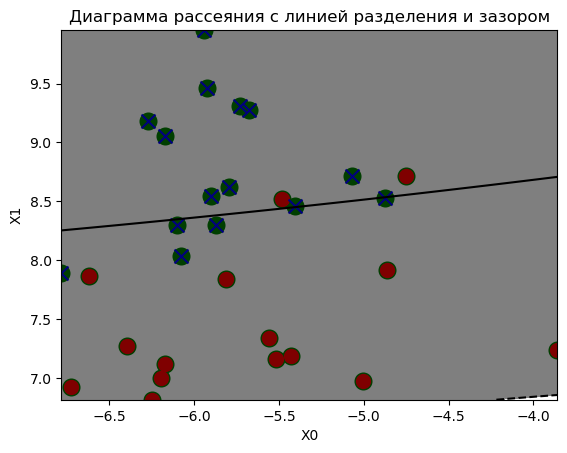

1.4222222222222223


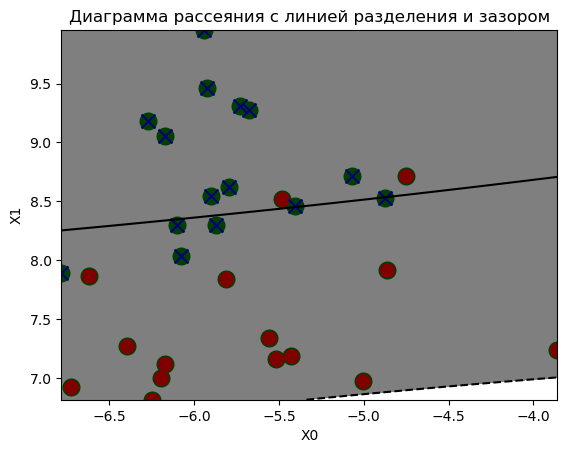

1.5424242424242425


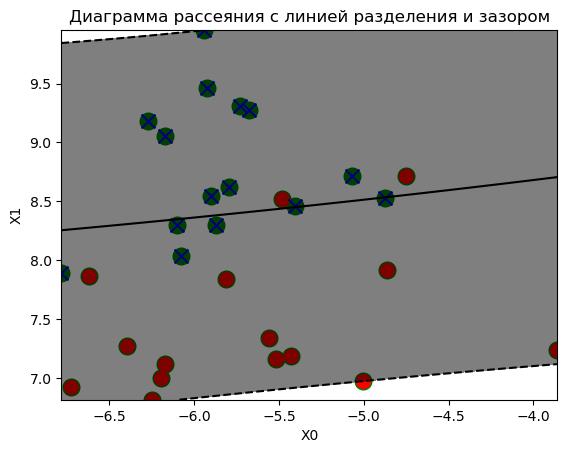

1.6626262626262627


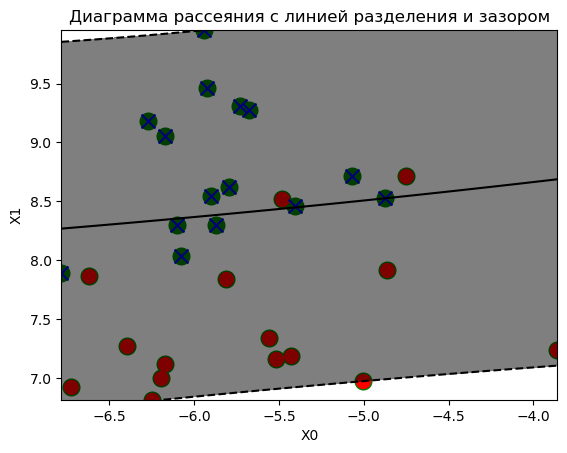

1.7828282828282829


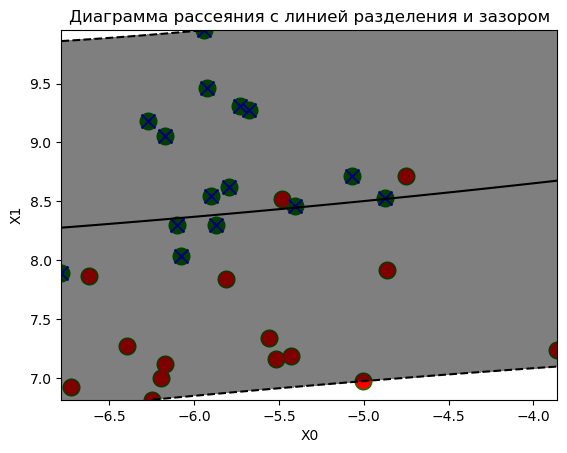

1.903030303030303


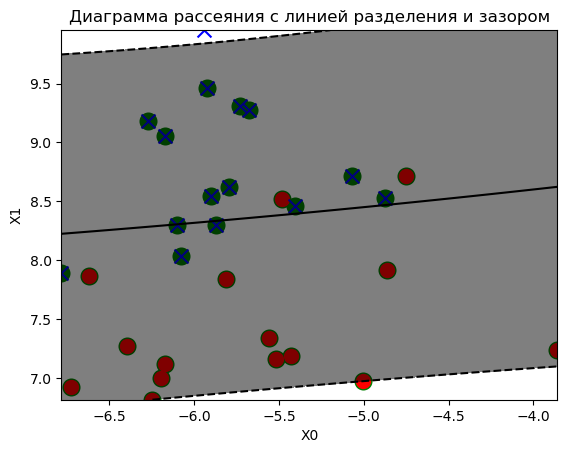

2.0232323232323233


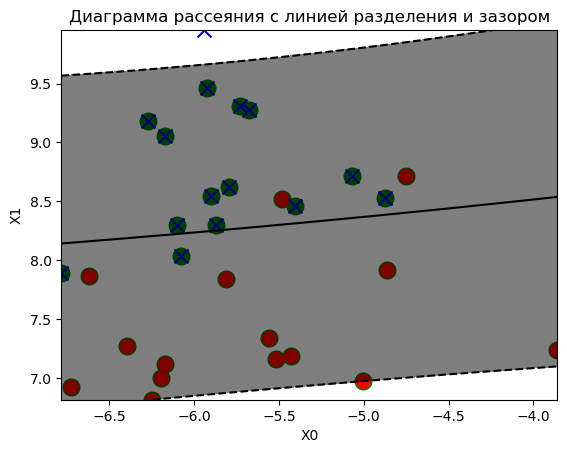

2.1434343434343437


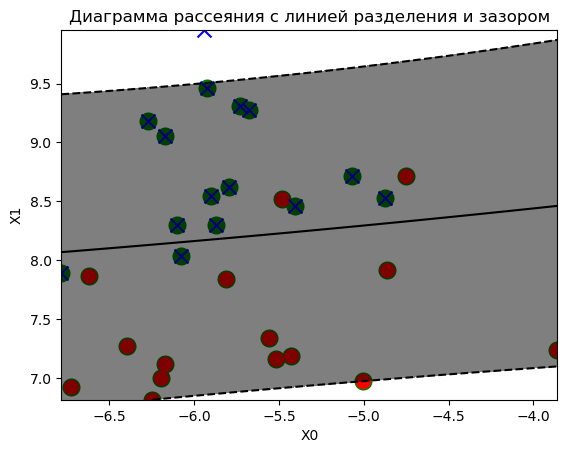

2.2636363636363637


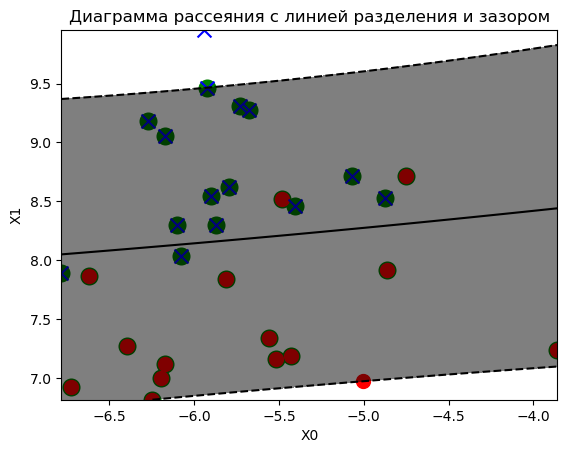

2.3838383838383836


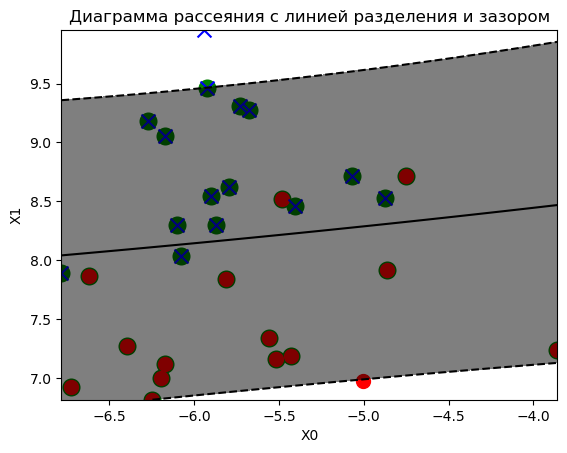

2.504040404040404


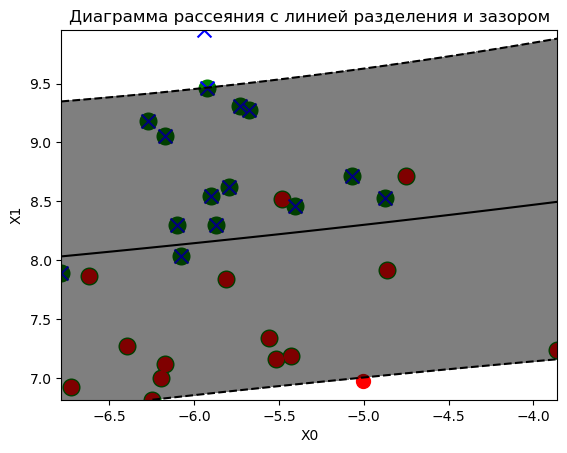

2.6242424242424245


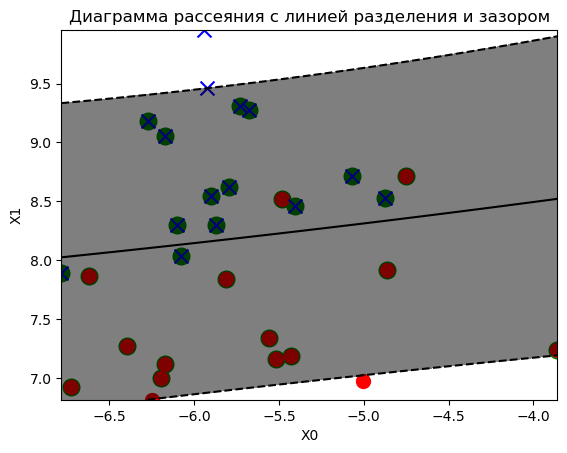

2.7444444444444445


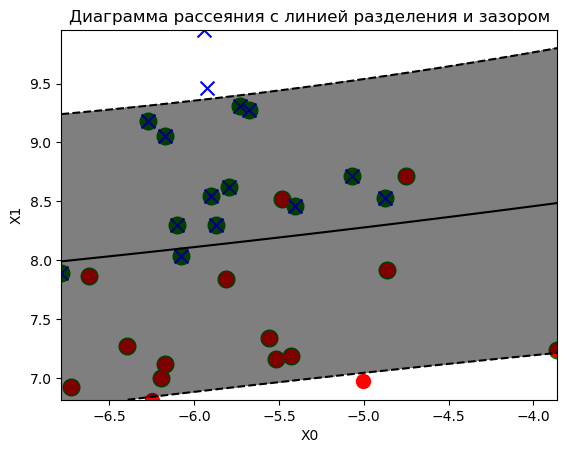

2.8646464646464644


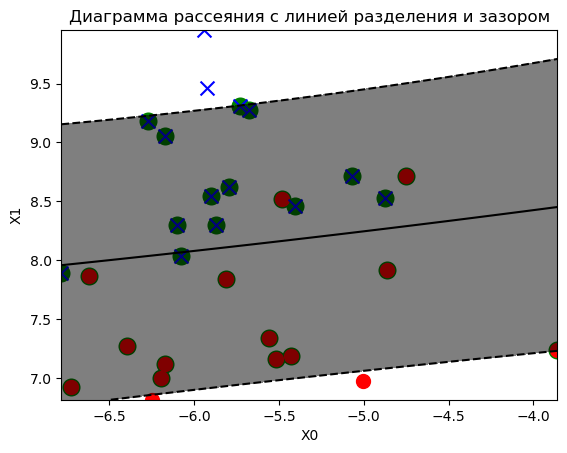

2.984848484848485


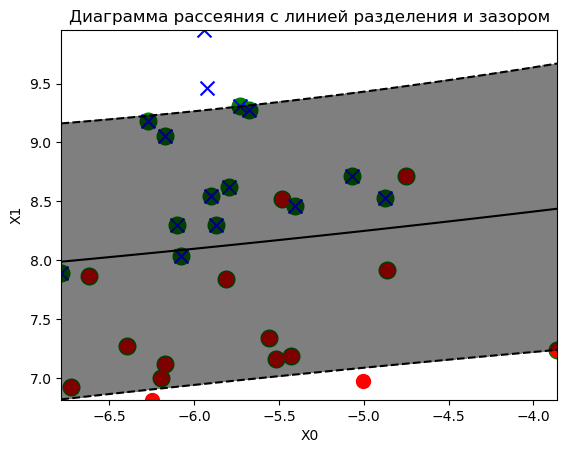

3.1050505050505053


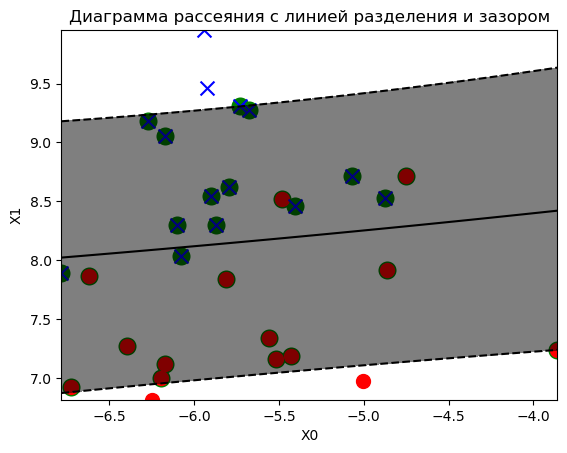

3.2252525252525253


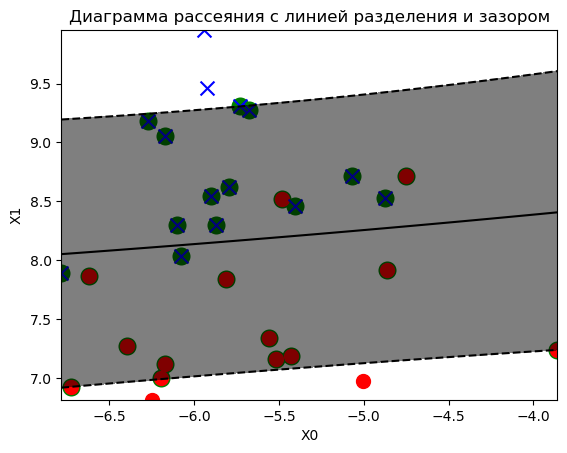

3.3454545454545452


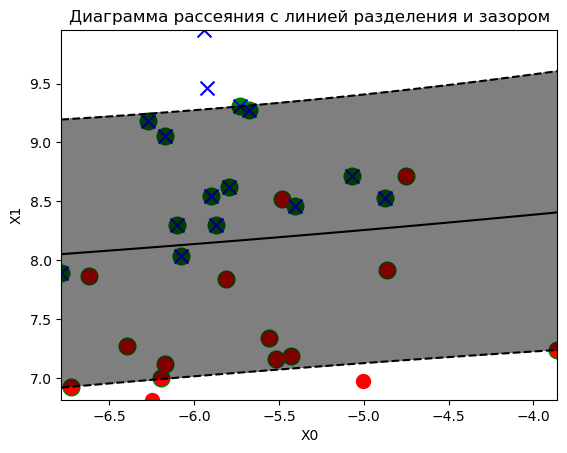

3.4656565656565657


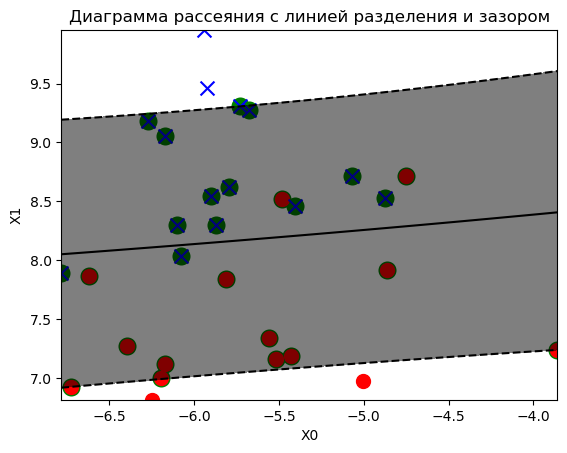

3.585858585858586


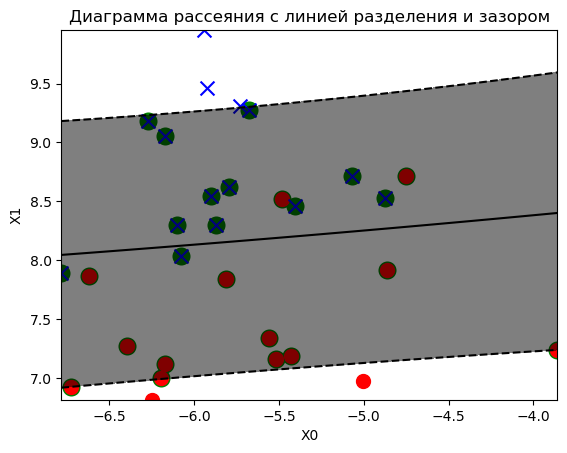

3.706060606060606


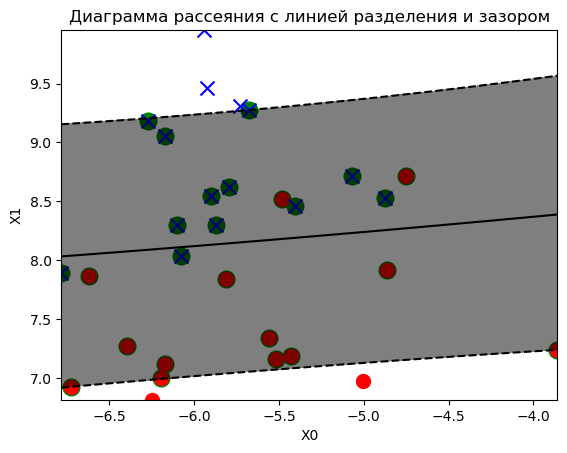

3.826262626262626


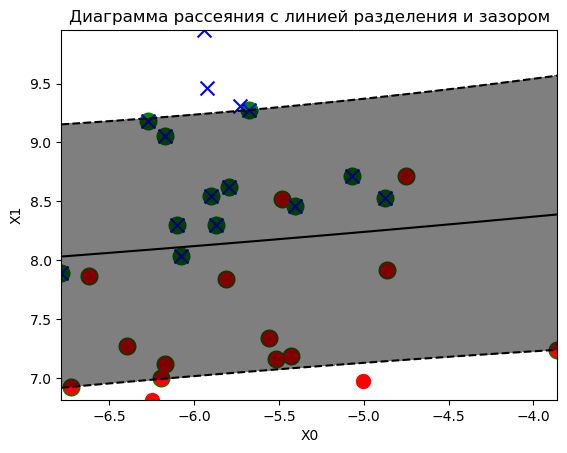

3.9464646464646465


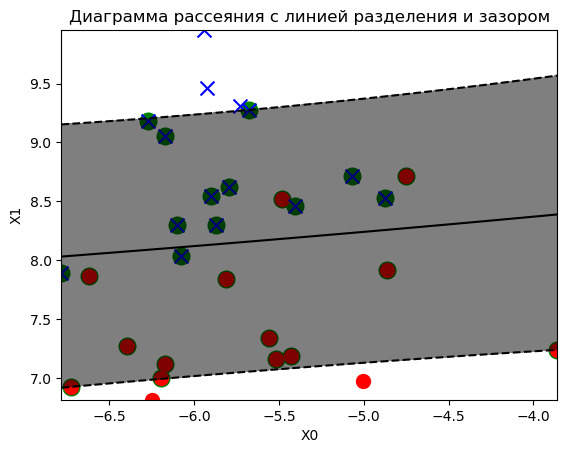

4.066666666666666


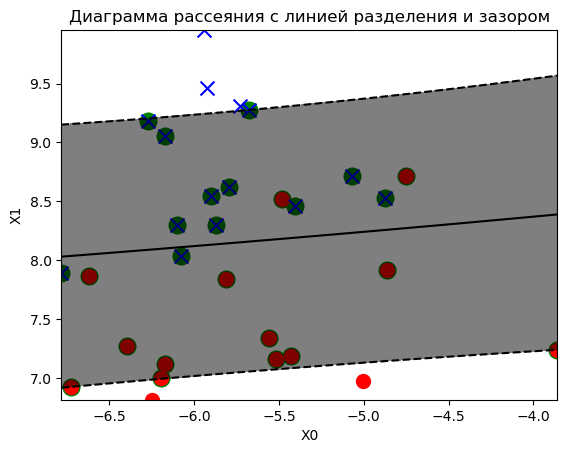

4.186868686868687


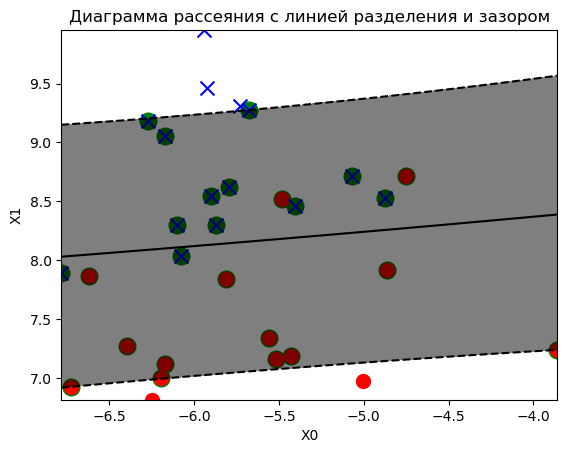

4.307070707070706


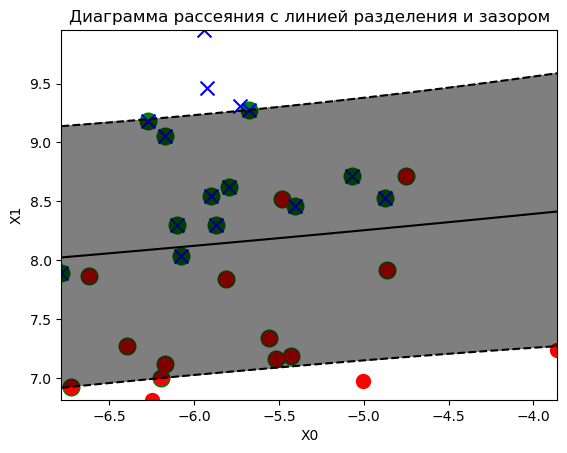

4.427272727272727


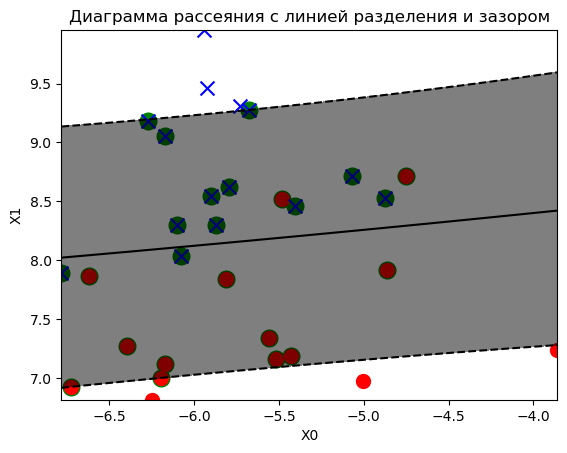

4.547474747474747


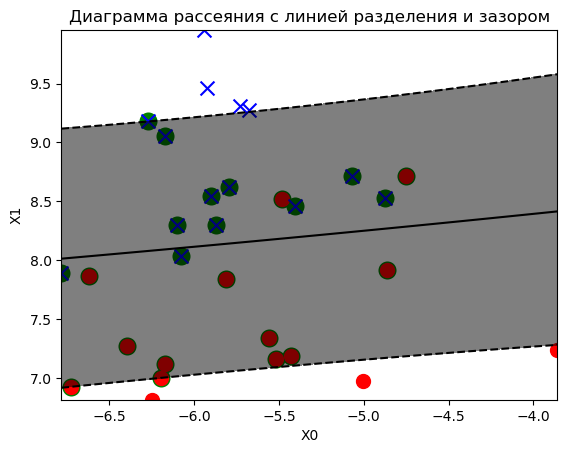

4.667676767676767


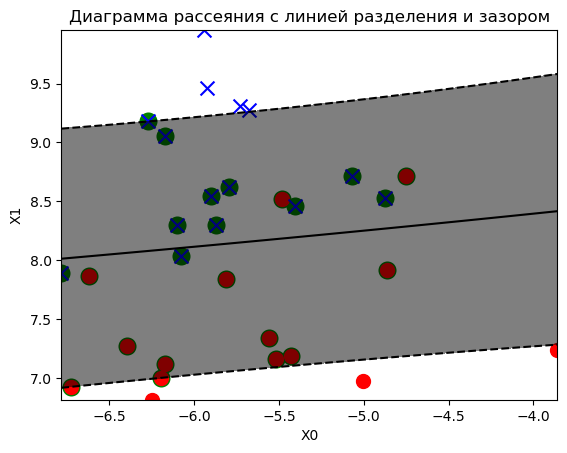

4.787878787878787


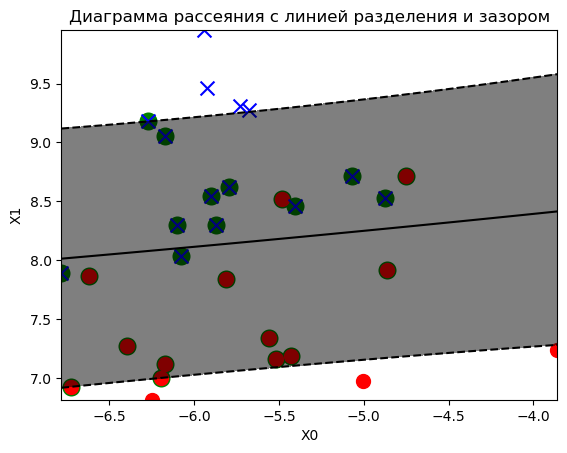

4.908080808080808


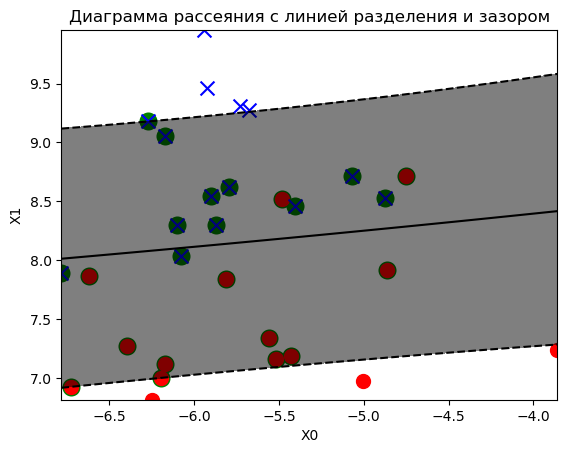

5.028282828282828


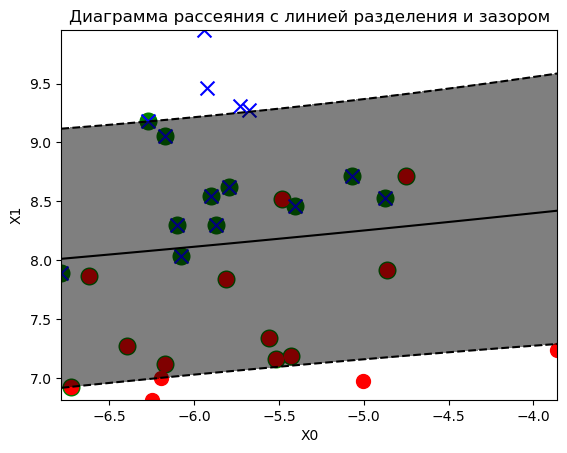

5.148484848484848


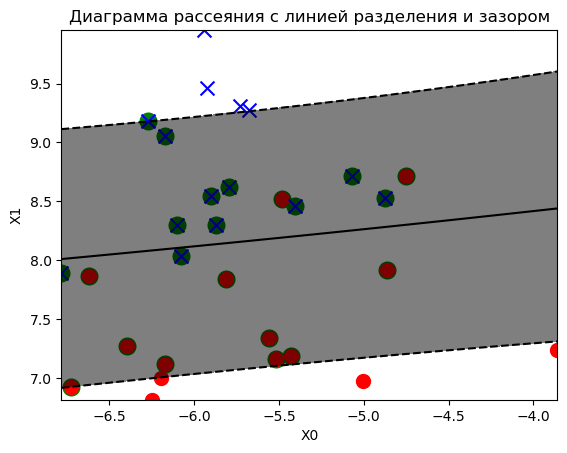

5.268686868686868


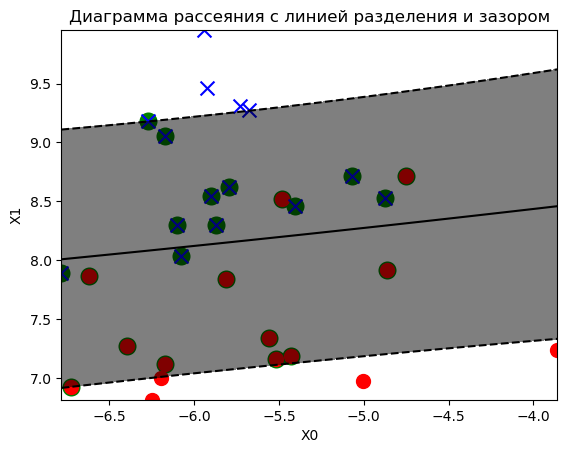

5.388888888888888


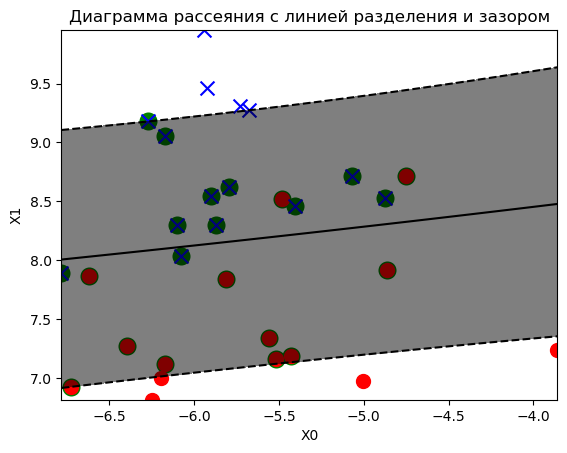

5.509090909090909


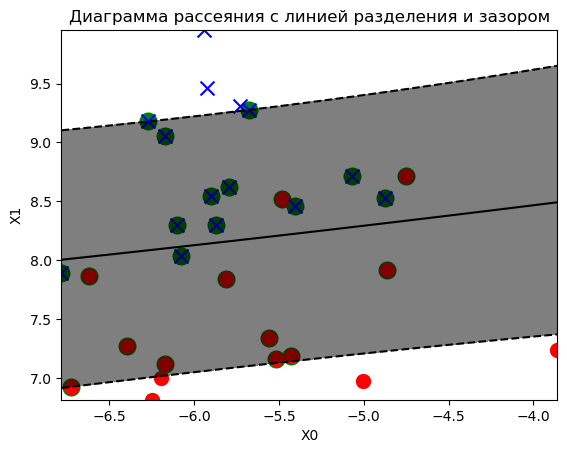

5.629292929292928


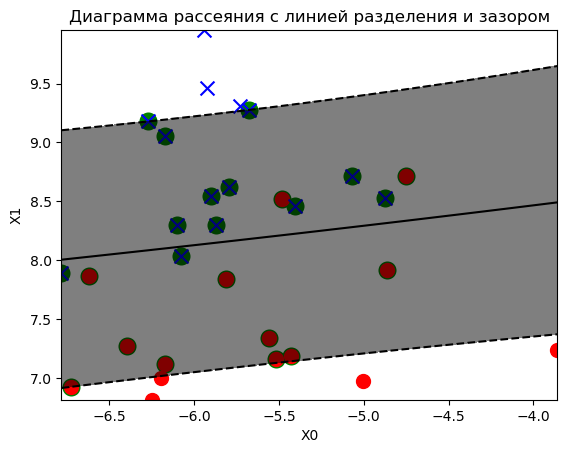

5.749494949494949


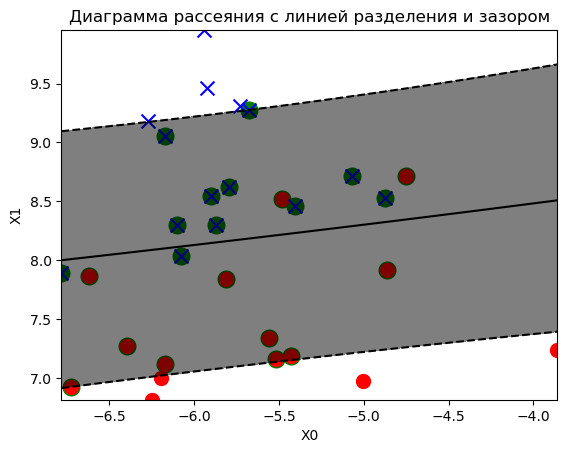

5.869696969696969


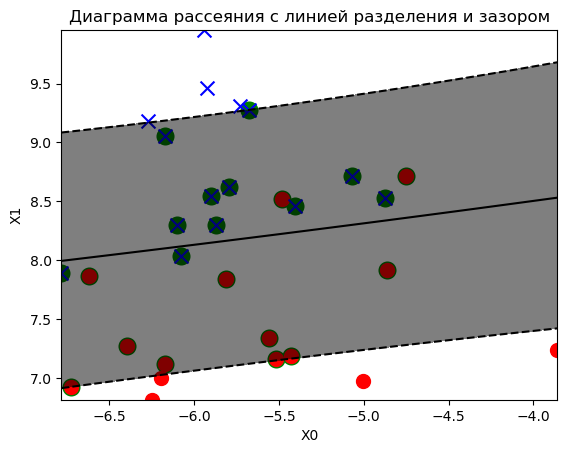

5.98989898989899


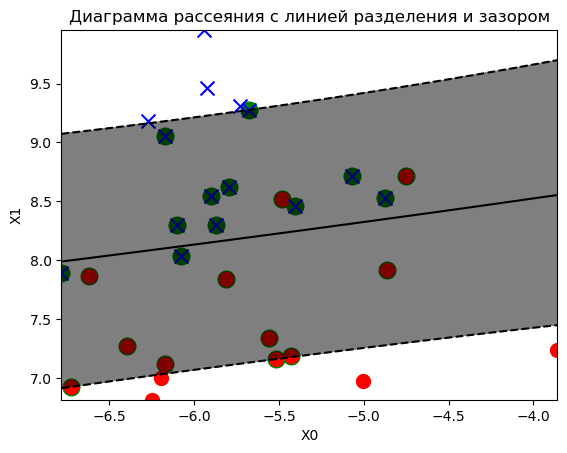

6.11010101010101


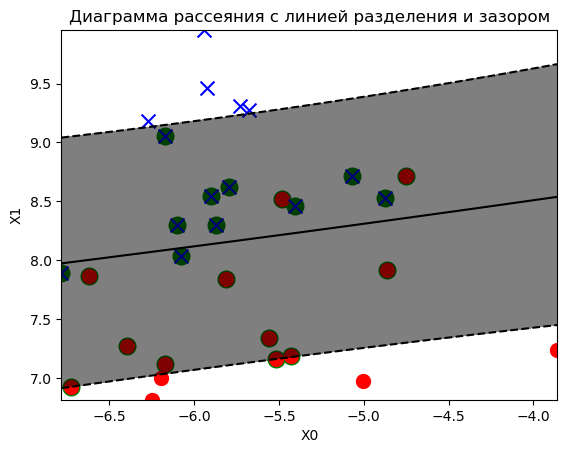

6.23030303030303


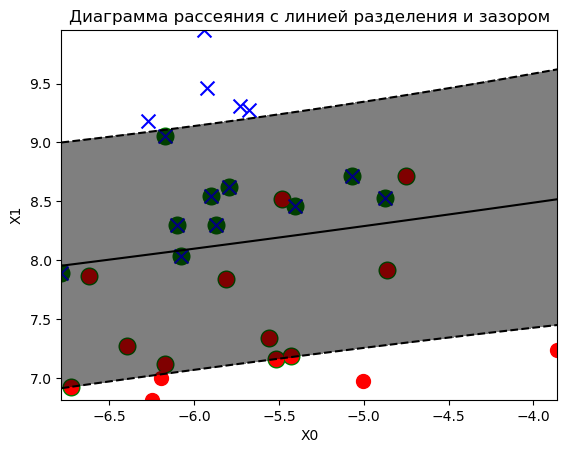

6.35050505050505


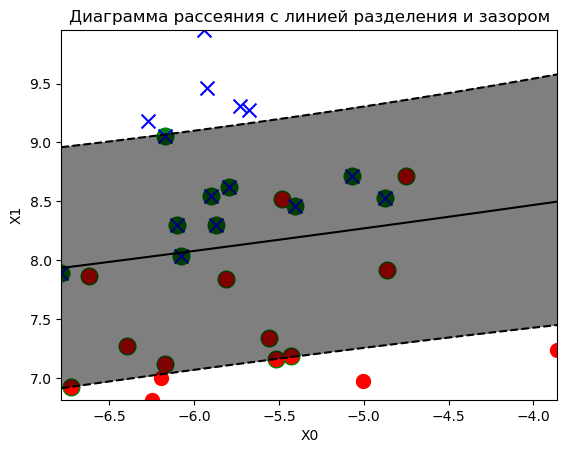

6.47070707070707


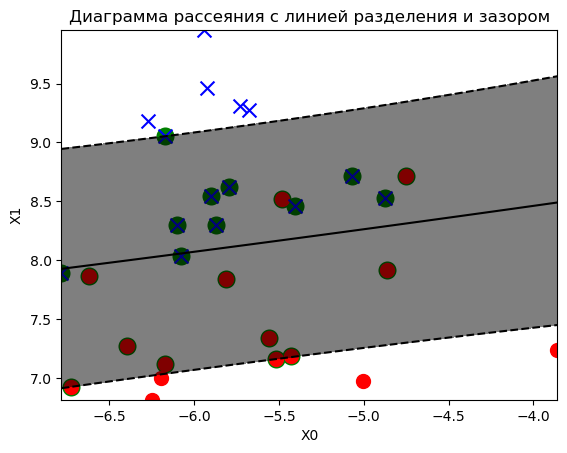

6.59090909090909


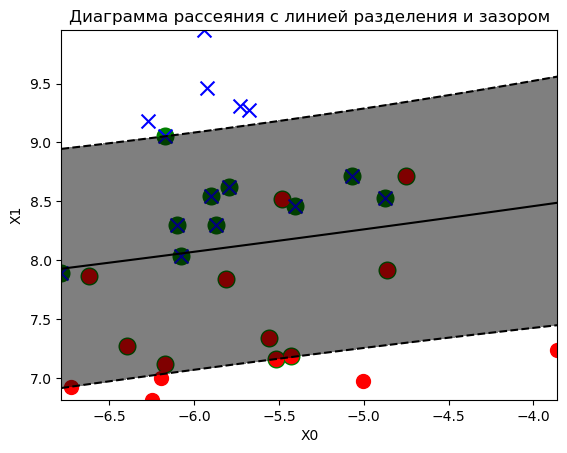

6.71111111111111


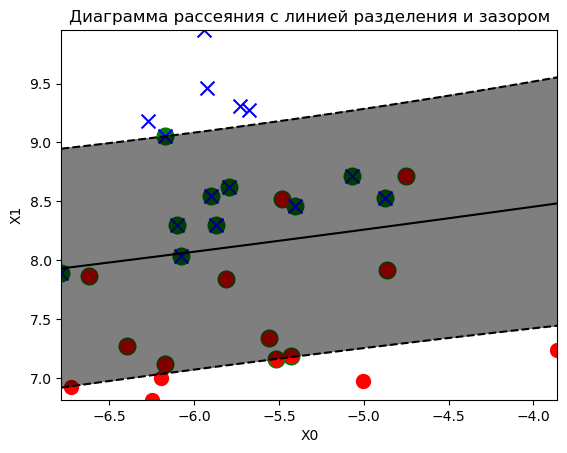

6.831313131313131


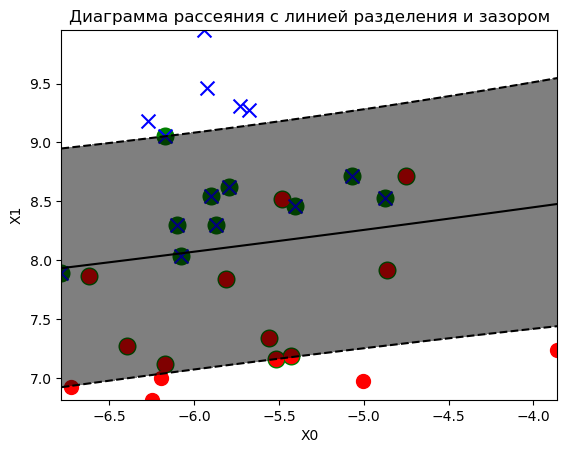

6.951515151515151


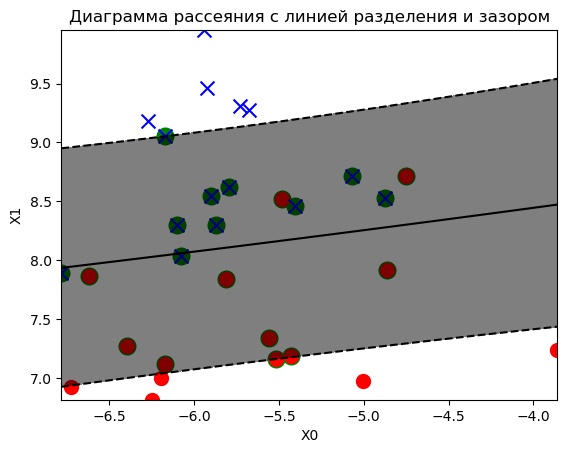

7.071717171717172


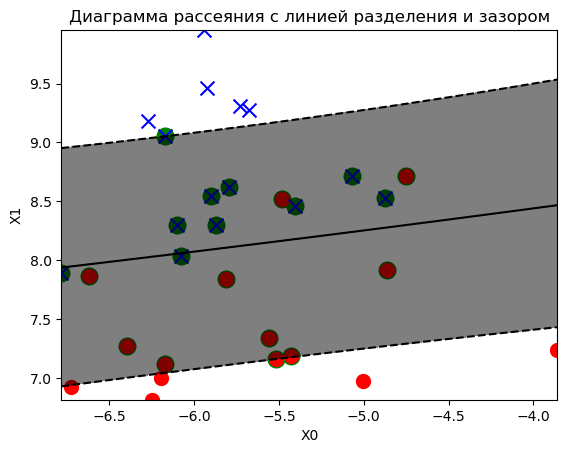

7.191919191919191


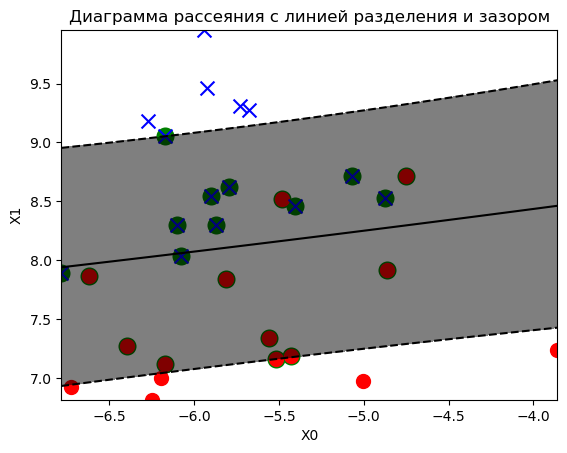

7.312121212121212


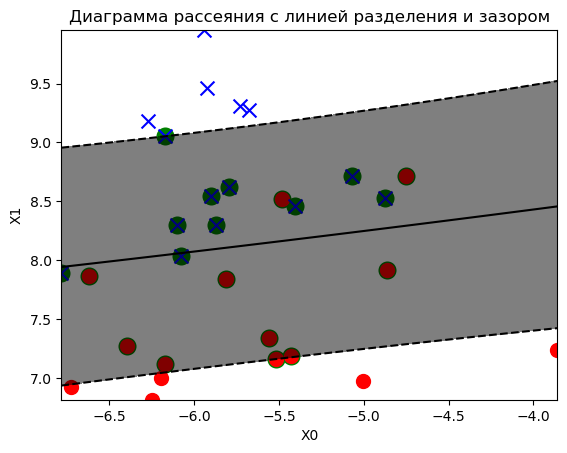

7.432323232323232


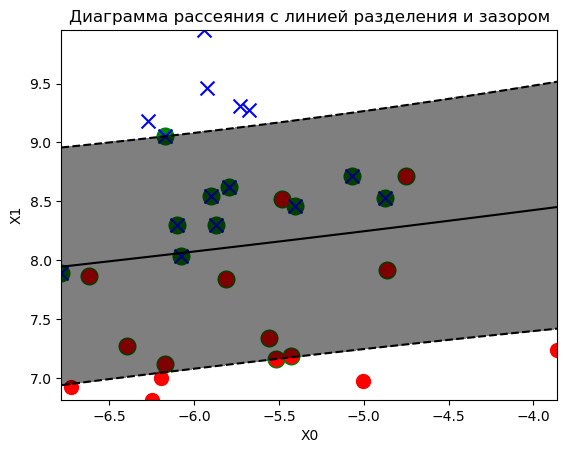

7.5525252525252515


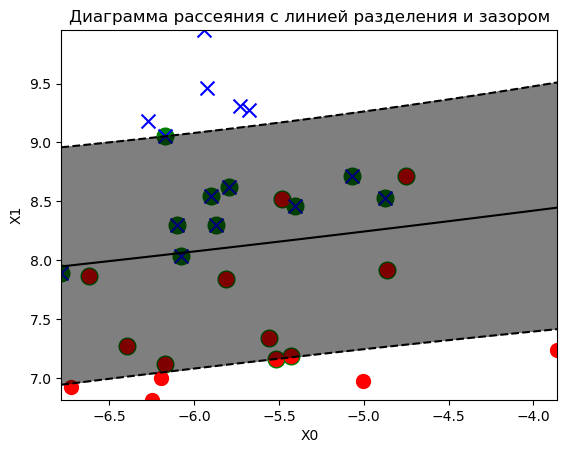

7.672727272727272


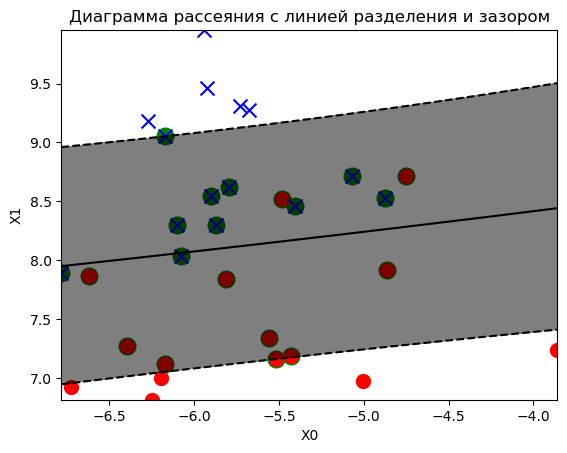

7.792929292929292


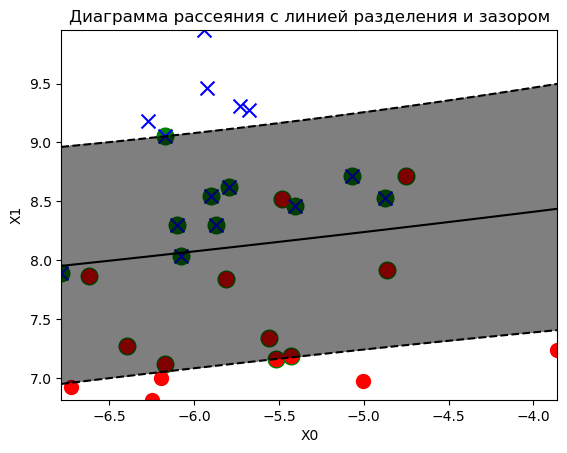

7.913131313131313


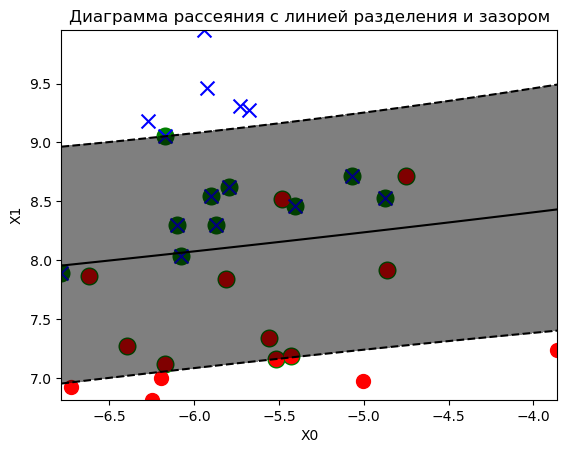

8.033333333333333


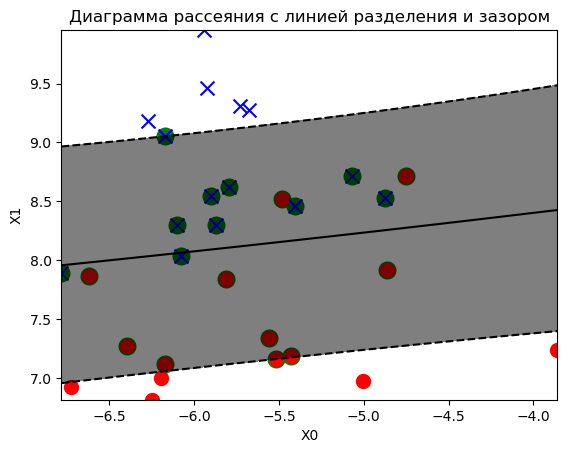

8.153535353535354


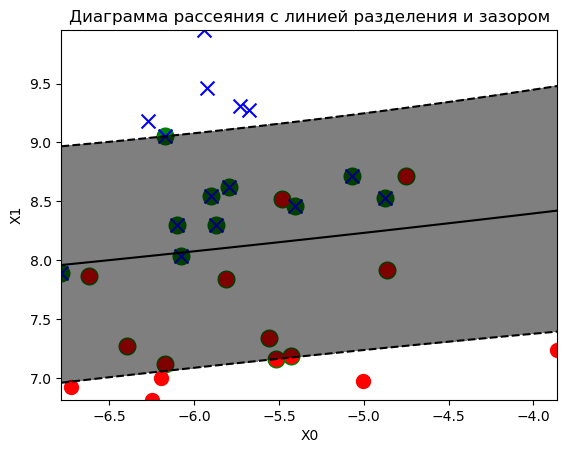

8.273737373737374


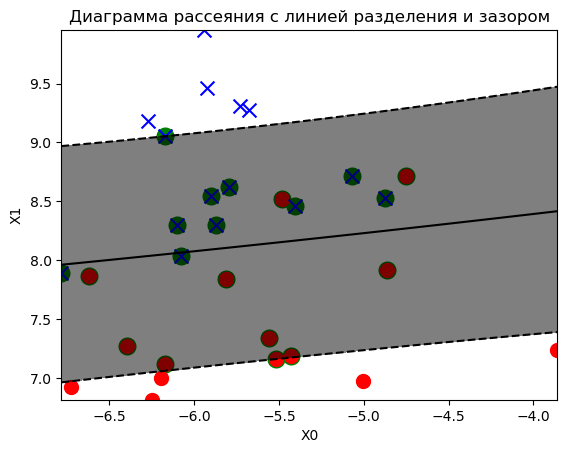

8.393939393939393


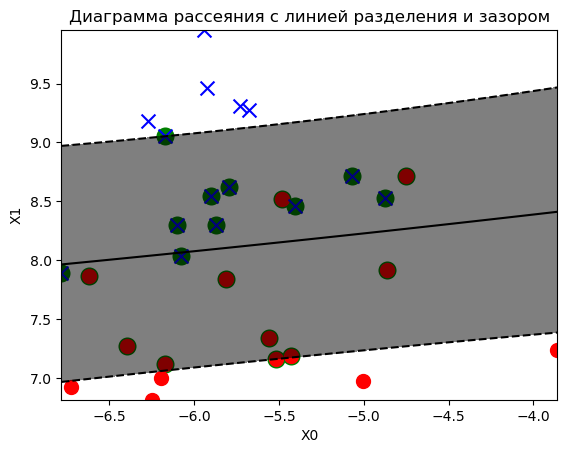

8.514141414141413


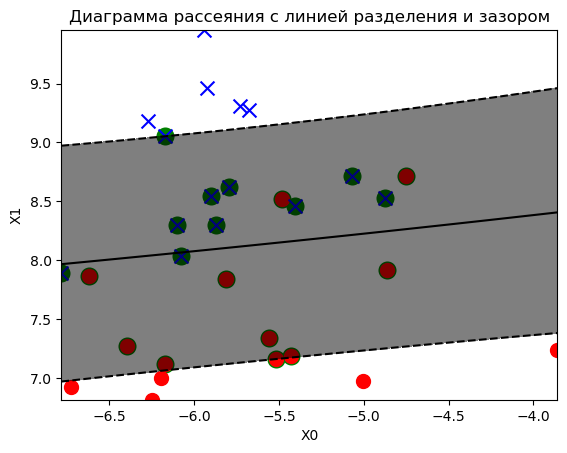

8.634343434343434


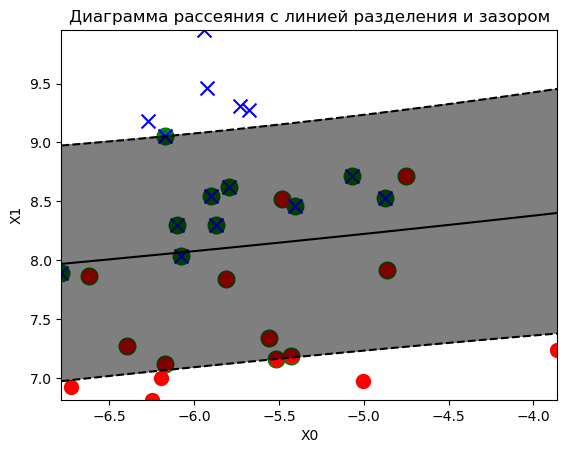

8.754545454545454


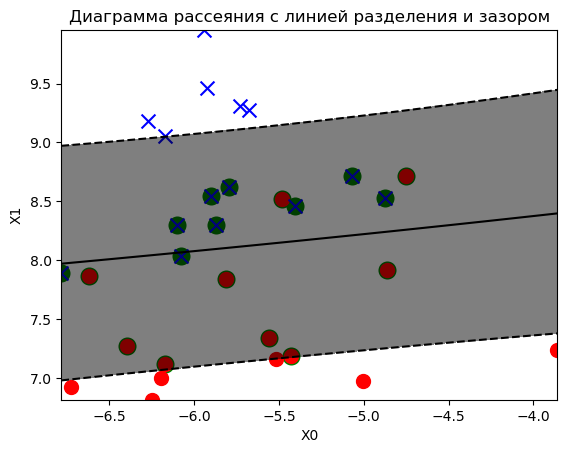

8.874747474747474


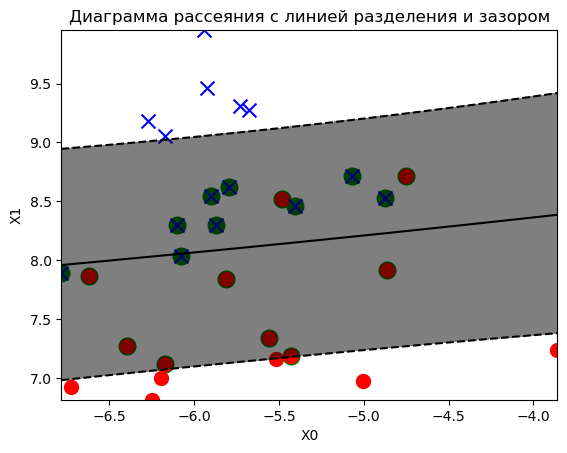

8.994949494949495


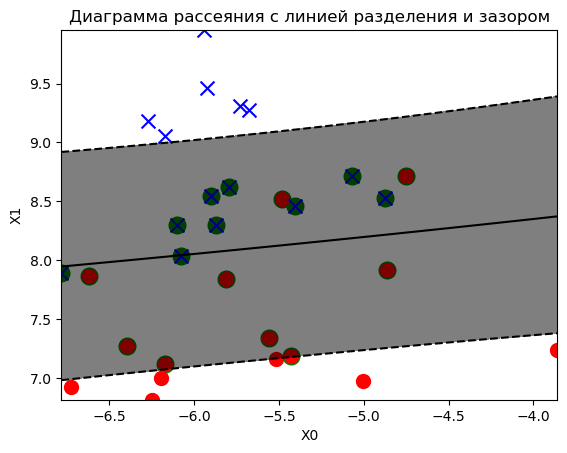

9.115151515151515


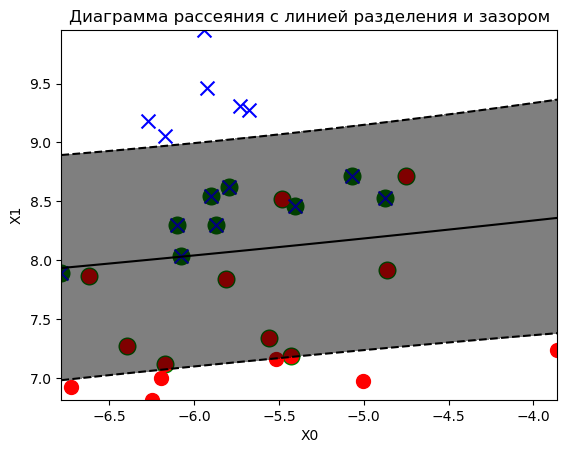

9.235353535353534


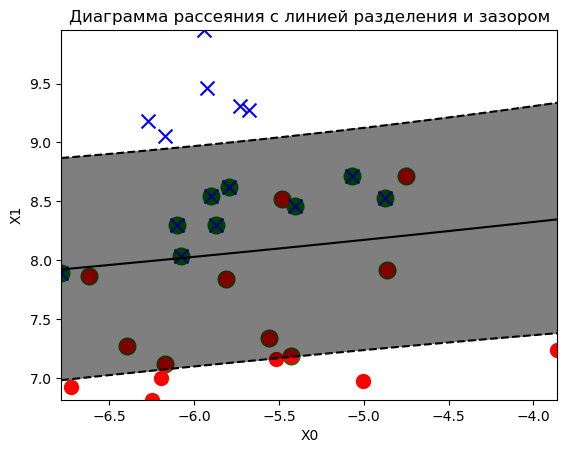

9.355555555555554


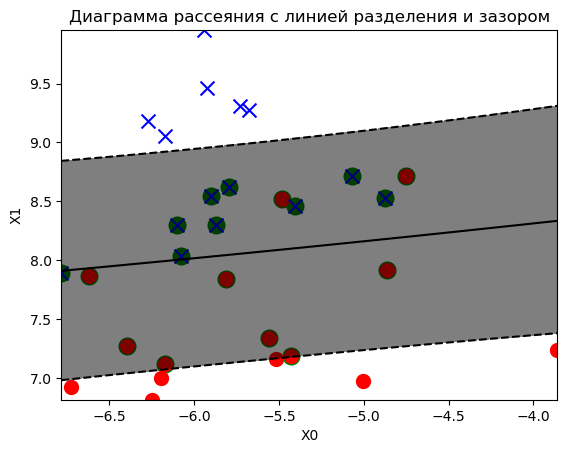

9.475757575757575


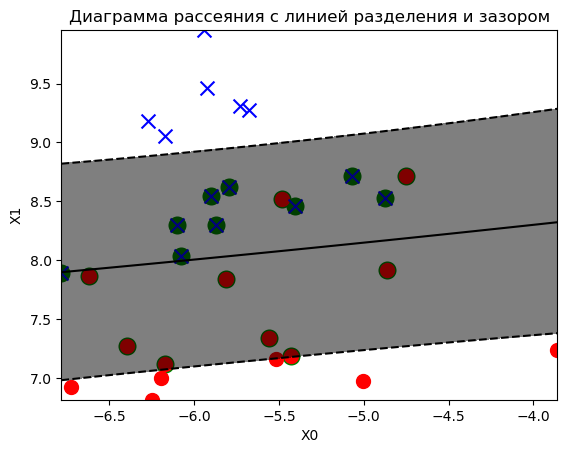

9.595959595959595


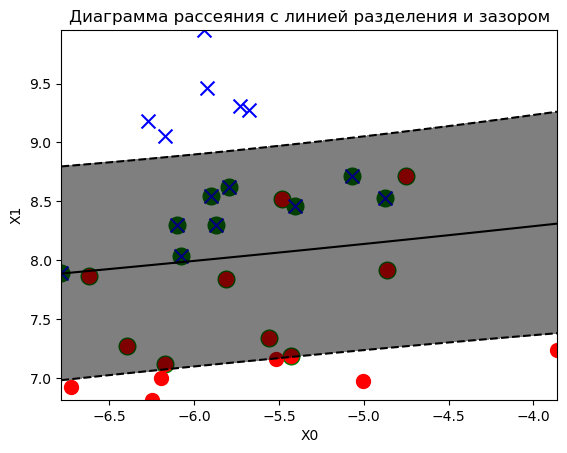

9.716161616161616


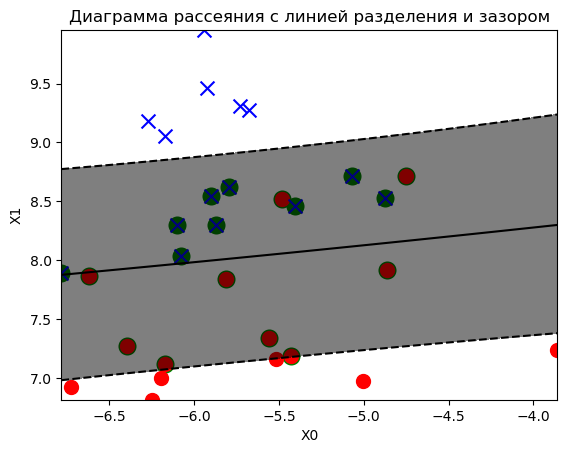

9.836363636363636


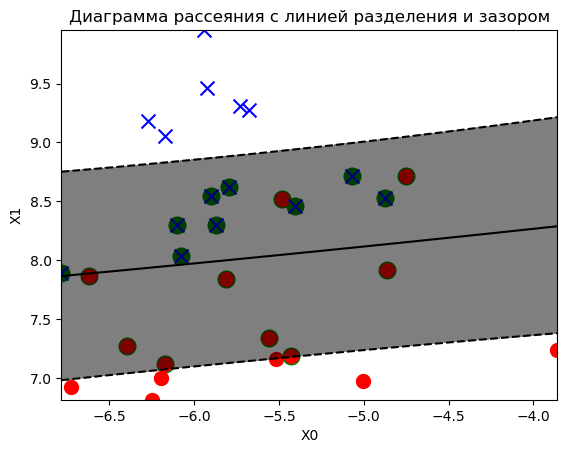

9.956565656565656


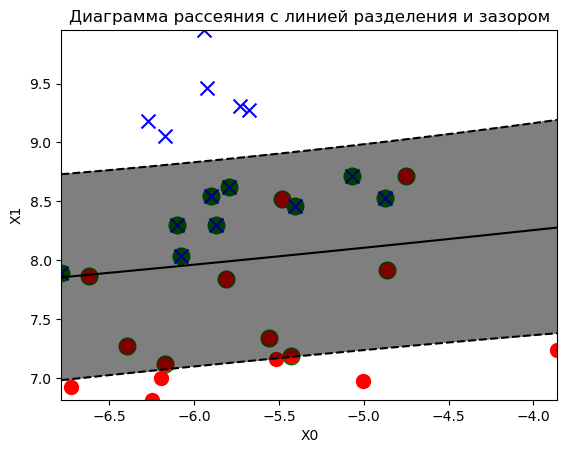

10.076767676767677


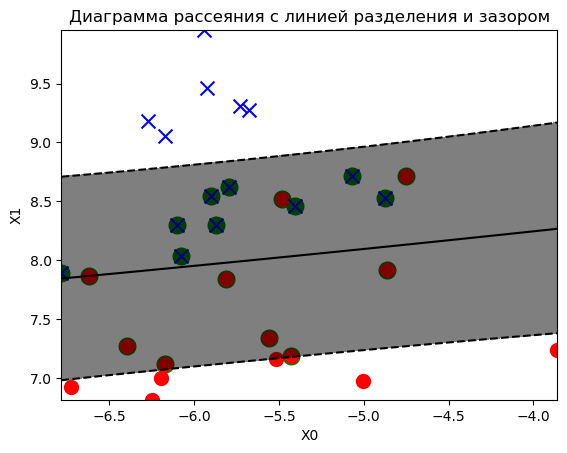

10.196969696969697


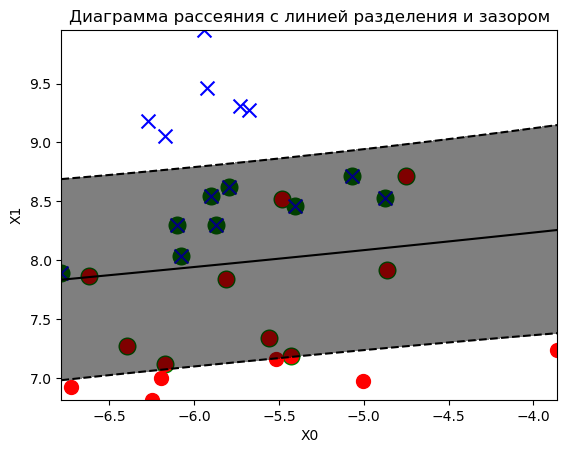

10.317171717171716


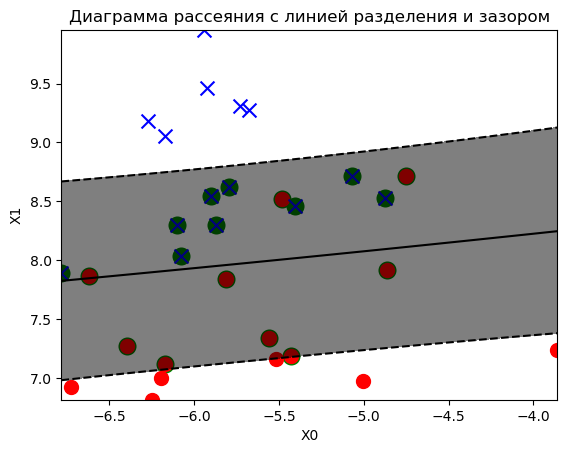

10.437373737373736


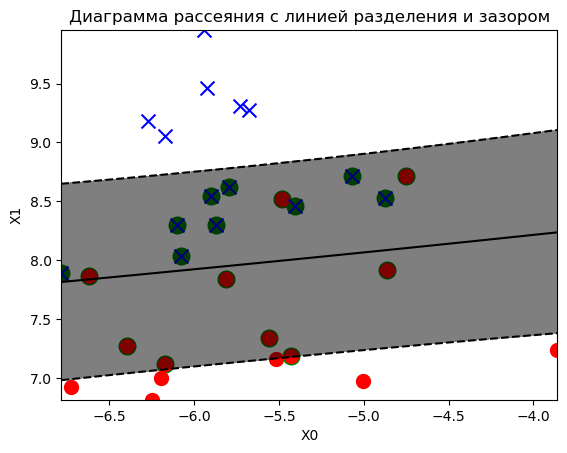

10.557575757575757


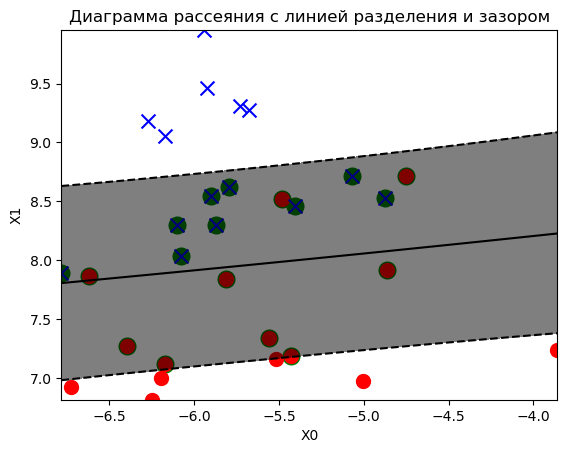

10.677777777777777


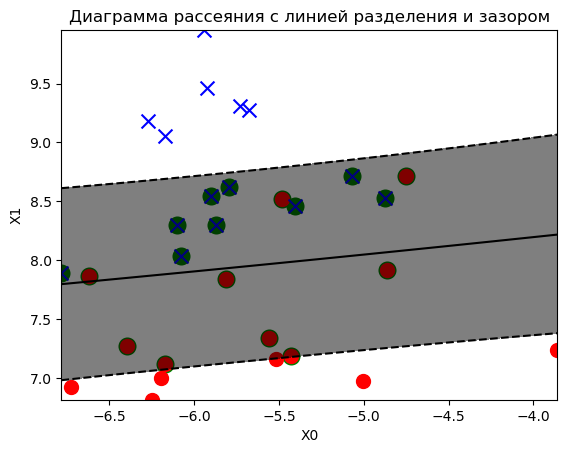

10.797979797979798


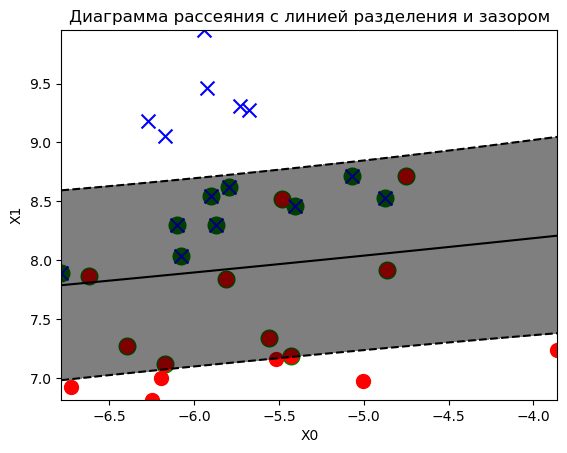

10.918181818181818


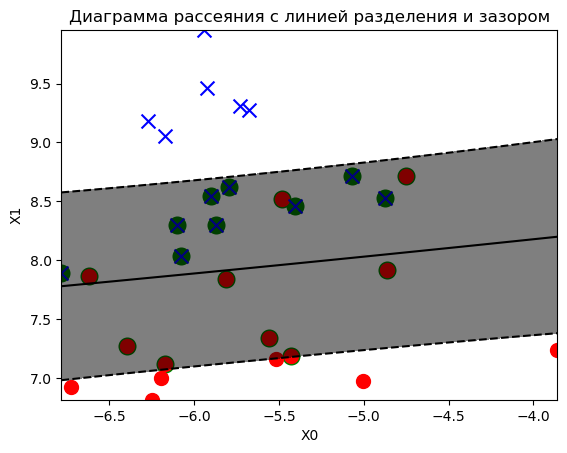

11.038383838383838


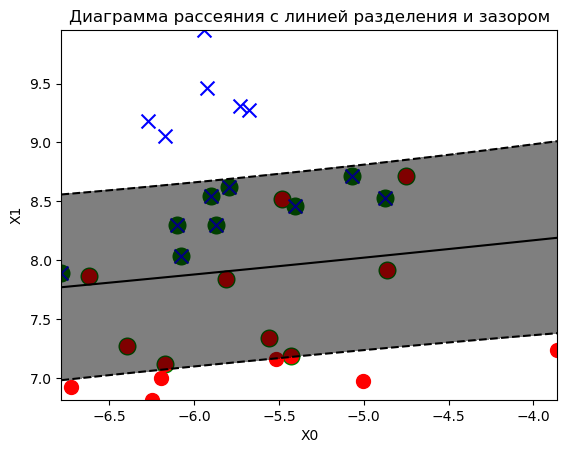

11.158585858585857


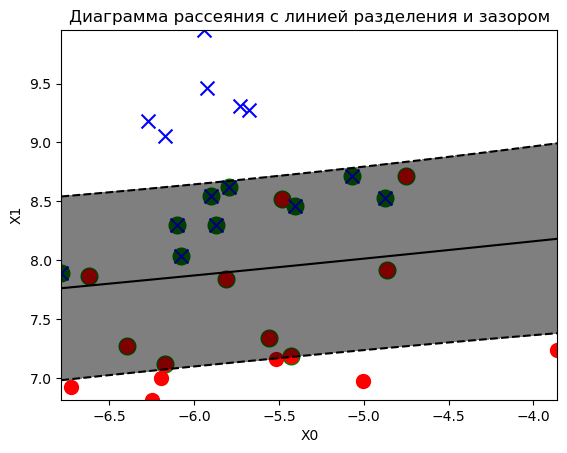

11.278787878787877


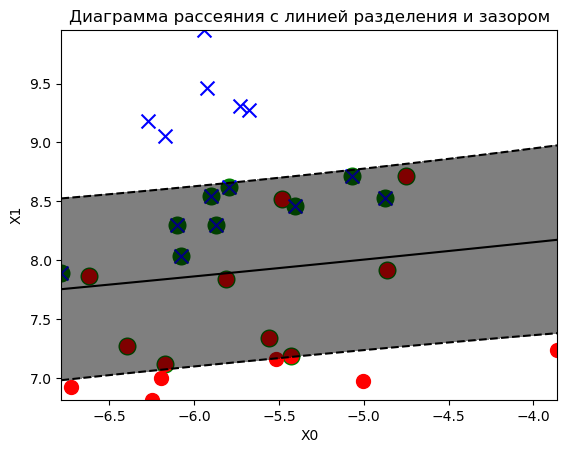

11.398989898989898


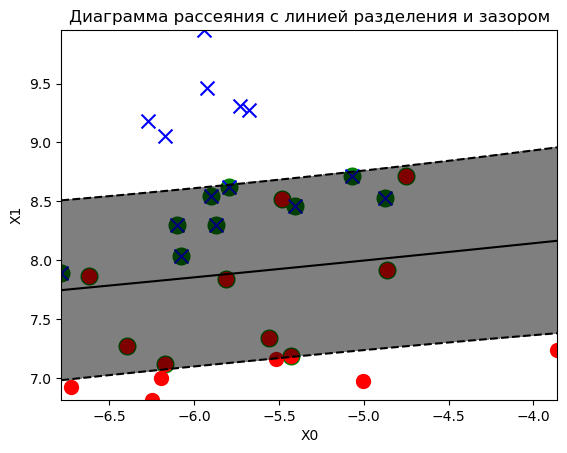

11.519191919191918


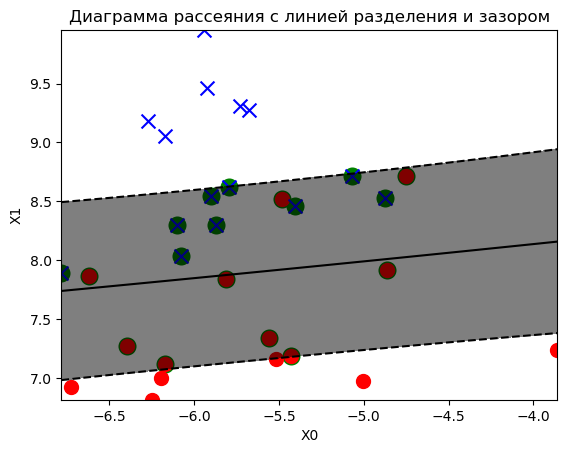

11.639393939393939


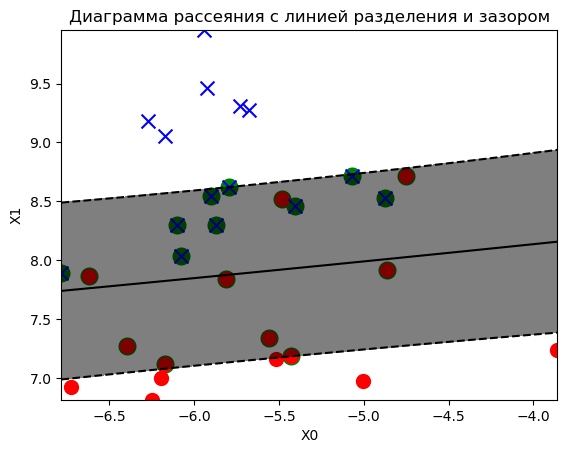

11.75959595959596


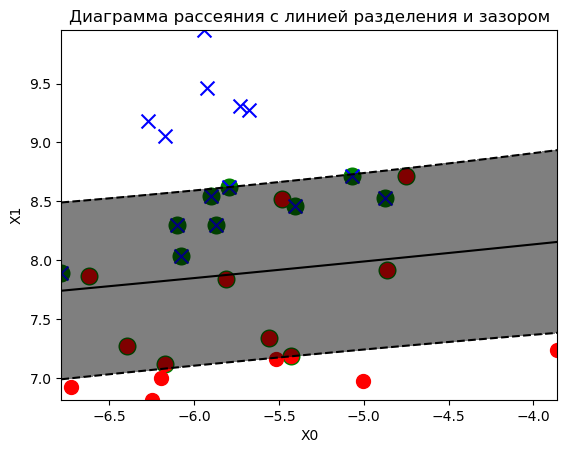

11.87979797979798


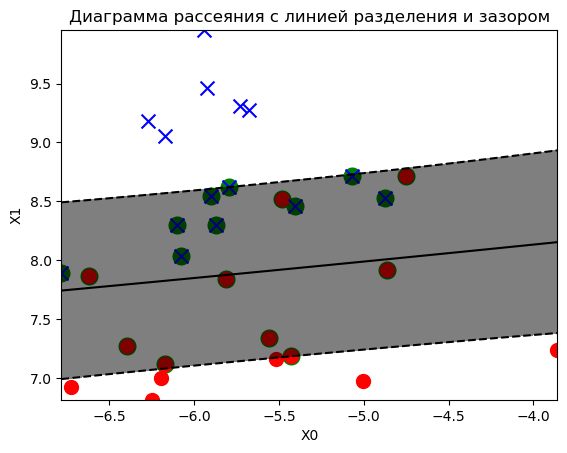

12.0


In [32]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)


for c in np.linspace(0.1,12,100):
    svm_rbf = SVC(kernel='rbf', C=c).fit(X, y)  
    plot_decision_regions(X, y, svm_rbf)
    print(c)

Значение `C` влияет на размер `Margin`

## 5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

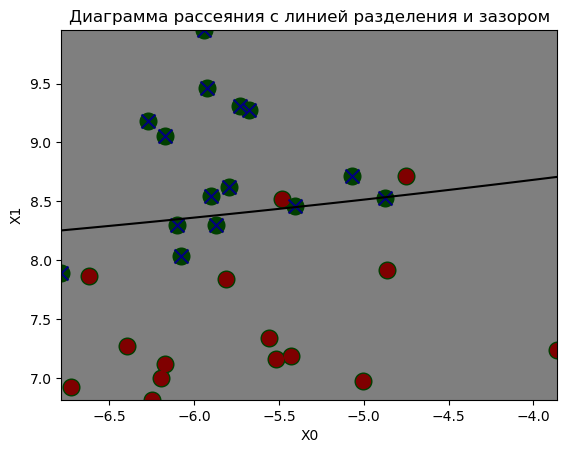

In [33]:
svm_rbf = SVC().fit(X, y)
plot_decision_regions(X, y, svm_rbf)

<Axes: >

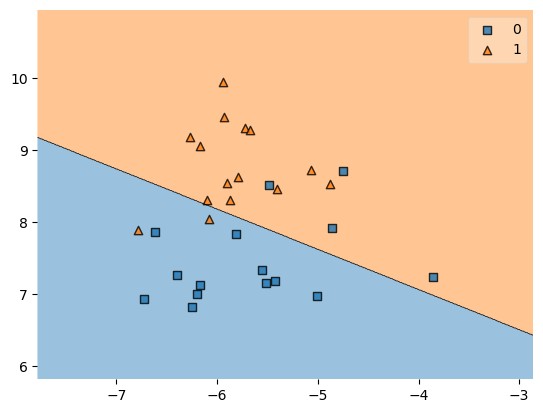

In [34]:
from mlxtend.plotting import plot_decision_regions as pdr

lsvc = LinearSVC().fit(X,y)
pdr(X, y, lsvc)

## 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [35]:
X, y = make_classification(n_samples=1000, n_features=5, random_state=1)
svc = SVC().fit(X, y)
svc.score(X, y)

0.868

In [ ]:
def make_model(kernel,c):
    svc = SVC(kernel=kernel, C=c).fit(X, y)
    return svc.score(X, y)

kernels = ['rbf','linear','poly','sigmoid']

kd = dict()
for i in kernels:
    kd[i] = []
    for c in tqdm(np.linspace(0.1,1000,100), f'{i}'):
        kd[i].append([make_model(i,c), c])
    kd[i] = np.array(kd[i])
    kd[i] = kd[i][kd[i][:,0] == kd[i][:,0].max()][0].reshape(2)
kd = pd.DataFrame(kd).T
kd = kd.sort_values(0, ascending=False)
kd.columns = ['score', 'C']
kd

sigmoid: 100%|██████████| 100/100 [00:07<00:00, 13.73it/s]


## 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [37]:
kernel = kd.index[0]

In [38]:
X, y = make_classification(n_samples=1000, n_features=5, random_state=1)

start_time = time.time()  # Начало замера времени
svc = SVC(kernel=kernel).fit(X, y)
linear_time = time.time() - start_time  # Конец замера времени
print(f"Время обучения модели: {linear_time:.4f} секунд")

svc.score(X, y)

Время обучения модели: 0.0443 секунд


0.868

In [39]:
X, y = make_classification(n_samples=10000, n_features=5, random_state=1)

start_time = time.time()  # Начало замера времени
svc = SVC(kernel=kernel).fit(X, y)
linear_time = time.time() - start_time  # Конец замера времени
print(f"Время обучения модели: {linear_time:.4f} секунд")

svc.score(X, y)

Время обучения модели: 2.0756 секунд


0.9562

In [40]:
X, y = make_classification(n_samples=30000, n_features=5, random_state=1)

start_time = time.time()  # Начало замера времени
svc = SVC(kernel=kernel).fit(X, y)
linear_time = time.time() - start_time  # Конец замера времени
print(f"Время обучения модели: {linear_time:.4f} секунд")

svc.score(X, y)

Время обучения модели: 16.8166 секунд


0.9629333333333333

In [41]:
X, y = make_classification(n_samples=50000, n_features=5, random_state=1)

start_time = time.time()  # Начало замера времени
svc = SVC(kernel=kernel).fit(X, y)
linear_time = time.time() - start_time  # Конец замера времени
print(f"Время обучения модели: {linear_time:.4f} секунд")

svc.score(X, y)

Время обучения модели: 89.4317 секунд


0.907

## 8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

def plot_decision_regions(X, y, model):
    # Приведение данных к двум измерениям (если больше двух столбцов)
    if X.shape[1] > 2:
        pca = PCA(n_components=2)
        X_plot = pca.fit_transform(X)
    else:
        X_plot = X

    # Определение диапазона для сетки
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

    # Создание сетки
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Предсказание классов для сетки
    grid = np.c_[xx.ravel(), yy.ravel()]
    if X.shape[1] > 2:
        # Обратное преобразование сетки через PCA для корректного предсказания
        grid_original = pca.inverse_transform(grid)
    else:
        grid_original = grid

    Z = model.predict(grid_original)
    Z = Z.reshape(xx.shape)

    # Построение границ принятия решений
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5, alpha=0.7)

    # Визуализация точек данных
    unique_classes = np.unique(y)
    colors = plt.cm.Paired(np.linspace(0, 1, len(unique_classes)))
    for i, label in enumerate(unique_classes):
        plt.scatter(X_plot[y == label, 0], X_plot[y == label, 1],
                    label=f'Class {label}', c=colors[i:i+1], edgecolor='k')

    # Отображение опорных векторов (если есть атрибут model.support_vectors_)
    if hasattr(model, 'support_vectors_'):
        if X.shape[1] > 2:
            support_vectors_2d = pca.transform(model.support_vectors_)
        else:
            support_vectors_2d = model.support_vectors_
        plt.scatter(support_vectors_2d[:, 0], support_vectors_2d[:, 1],
                    s=100, facecolors='none', edgecolors='green', label='Support Vectors')

    plt.title("Decision Boundaries")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


0.872


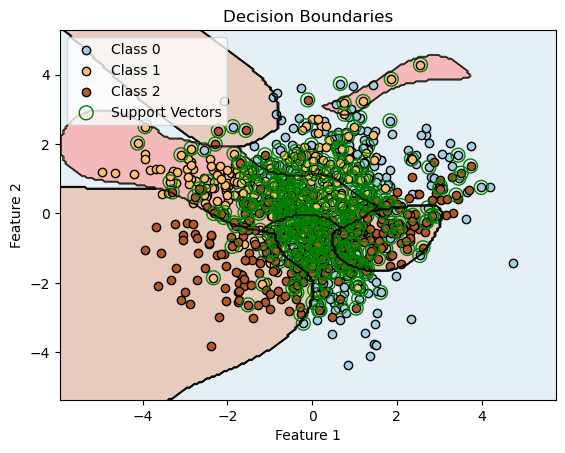

In [65]:
X, y = make_classification(n_features=3,n_classes=3, n_informative=3,n_redundant=0, n_samples=1000, random_state=3)


m = SVC(kernel='rbf', decision_function_shape='ovr', C=1000).fit(X, y)
print(m.score(X,y))


plot_decision_regions(X, y, m)

##  9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [2]:
# Импортируем необходимые библиотеки
from sklearn.datasets import load_iris

# Загружаем датасет Iris из sklearn
data = load_iris()
X, y = data.data, data.target

# Создаем и обучаем модель метода опорных векторов
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X, y)

# Прогнозируем значения на тестовой выборке
y_pred = svm_model.predict(X)

# Оцениваем качество модели
accuracy = accuracy_score(y, y_pred)

accuracy

0.9933333333333333

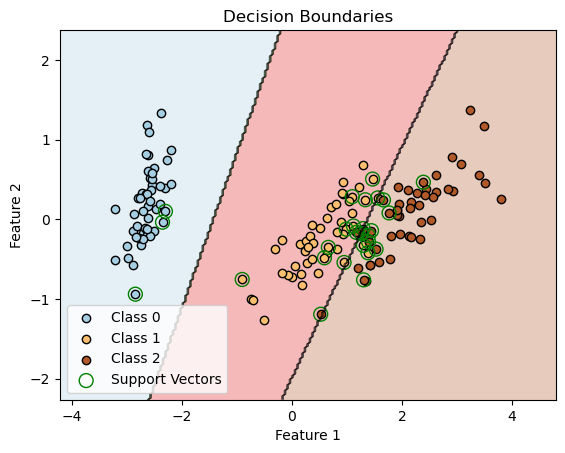

In [5]:
plot_decision_regions(X,y,svm_model)

##  10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [8]:
from sklearn.datasets import load_diabetes

# Загружаем датасет Iris из sklearn
data = load_iris()
X, y = data.data, data.target

svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X,y)

y_pred_reg = svr_model.predict(X)

# Оцениваем качество модели
mse = mean_squared_error(y, y_pred_reg)
r2 = r2_score(y, y_pred_reg)

mse, r2

(0.04692338956336438, 0.9296149156549535)